In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set()
#palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

ModuleNotFoundError: No module named 'folium'

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.19.2
Pandas Version 1.1.3
Seaborn Version 0.11.0
Matplotlib Version 3.3.2


In [3]:
#!pip install folium

In [5]:
pd.options.display.max_columns = None

In [8]:
df = pd.read_excel("LifeInsuranceSales.xlsx", sheet_name= 'Sales') 

In [9]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [10]:
df.shape

(4520, 20)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [12]:
df.drop(columns=['CustID'],  inplace=True)

In [13]:
df_null = df.isnull().sum()

In [14]:
df_null

AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [15]:
#df_null_zone = df.groupby('Zone')['Age'].isnull().sum()
df_null_zone = df['Age'].isnull().groupby(df['Zone']).sum()

In [16]:
df_zone = df['Age'].groupby(df['Zone']).sum()

In [17]:
df_null_zone

Zone
East       1
North    114
South      0
West     154
Name: Age, dtype: int64

In [18]:
df_zone

Zone
East       884.0
North    25367.0
South       70.0
West     35296.0
Name: Age, dtype: float64

In [19]:
df["MaritalStatus"].replace({"Unmarried": "Single"}, inplace=True)

In [20]:
df["Gender"].replace({"Fe male": "Female"}, inplace=True)

In [21]:
df["Occupation"].replace({"Laarge Business": "Large Business"}, inplace=True)

In [22]:
df["EducationField"].replace({"UG": "Under Graduate"}, inplace=True)

In [23]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


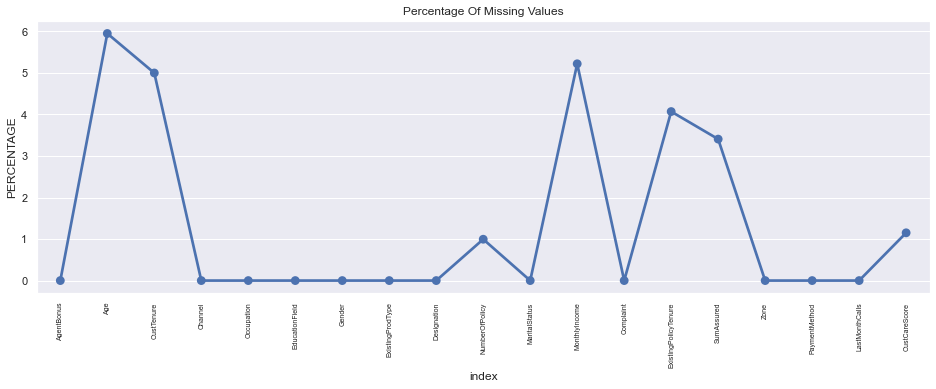

In [24]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize = 7)
plt.title('Percentage Of Missing Values')
plt.ylabel("PERCENTAGE")
plt.show()

In [25]:
#All continous variables in cname
cname = df.columns[(df.dtypes=="float64")|(df.dtypes=="int64")].tolist()
print(cname)

#All categorical var in cat_names and removing target var
cat_names = df.select_dtypes(exclude=np.number).columns.tolist()
cat_names

['AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']


['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus',
 'Zone',
 'PaymentMethod']

In [26]:
df[['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus',
 'Zone',
 'PaymentMethod']].describe(include='all')

,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone,PaymentMethod
count,4520,4520,4520,4520,4520,4520,4520,4520
unique,3,4,6,2,6,3,4,4
top,Agent,Salaried,Graduate,Male,Manager,Married,West,Half Yearly
freq,3194,2192,1870,2688,1620,2268,2566,2656


In [27]:
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Single,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,6.0,NaN,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


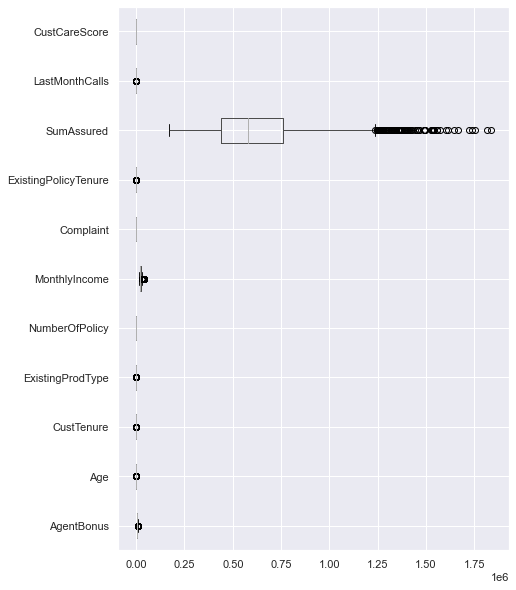

In [28]:
# construct box plot for continuous variables
plt.figure(figsize=(7,10))
df[cname].boxplot(vert=0)
plt.show()

AgentBonus


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Age
CustTenure

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))



ExistingProdType


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated funct

NumberOfPolicy
MonthlyIncome


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Complaint
ExistingPolicyTenure


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated funct

SumAssured


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


LastMonthCalls


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


CustCareScore


C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


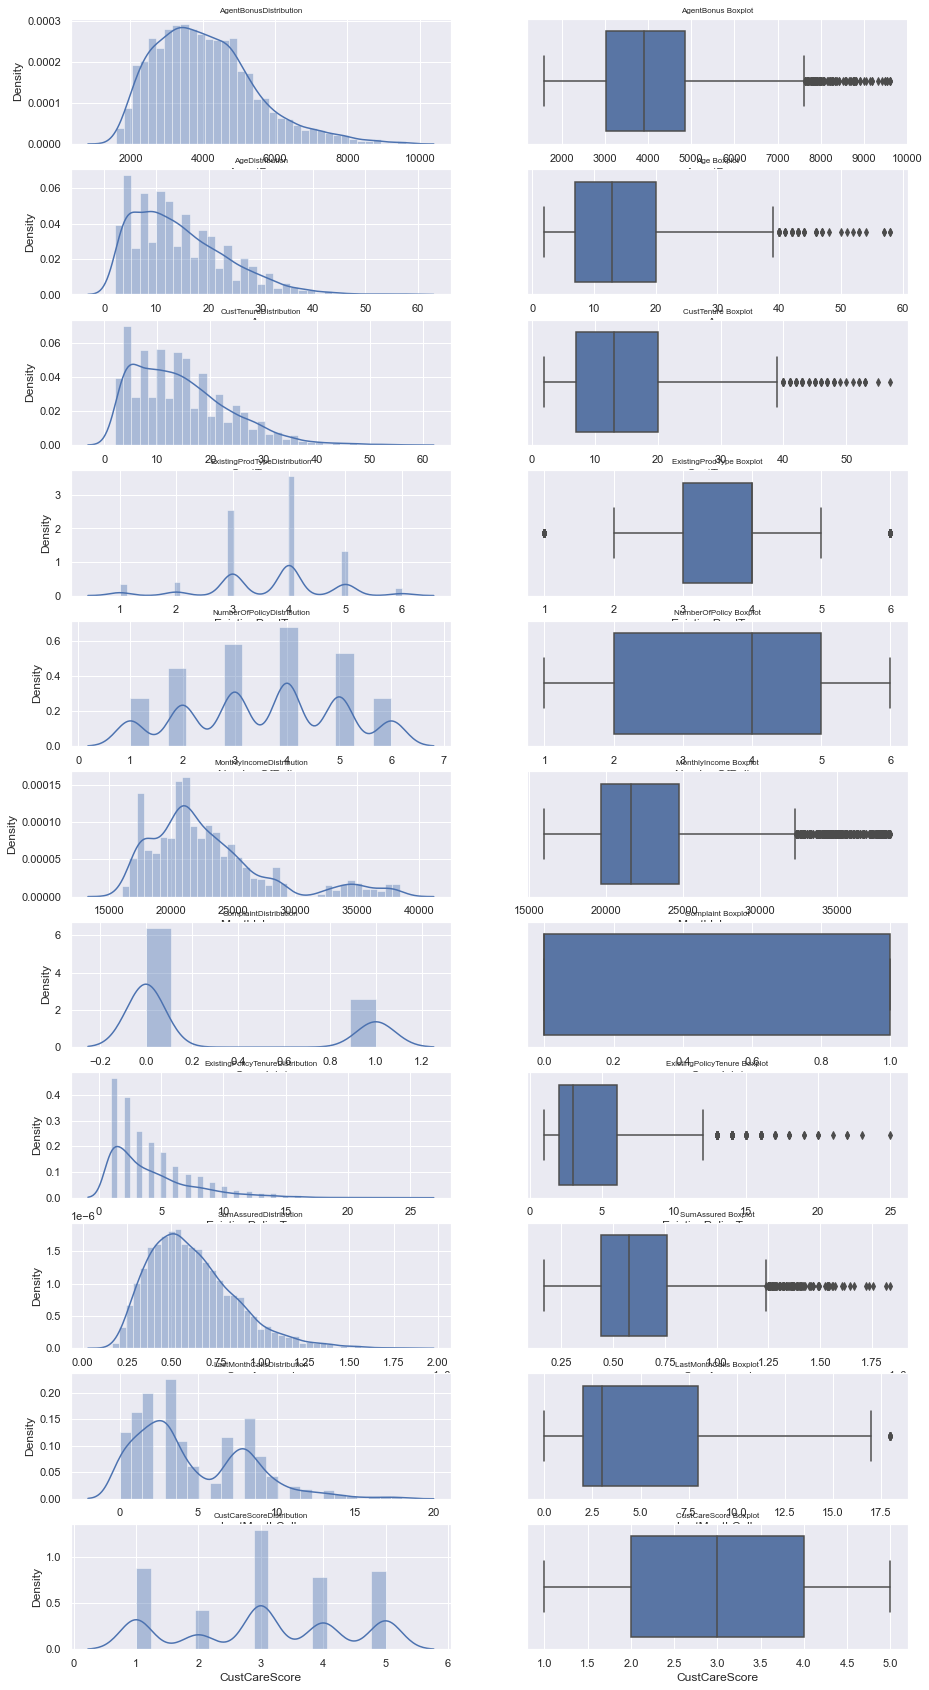

In [29]:
fig, axes = plt.subplots(nrows=11,ncols=2)
fig.set_size_inches(15,30)
j=0
for i in cname:
    print (i)
    a = sns.distplot(df[i] , ax=axes[j][0])
    a.set_title(i+"Distribution",fontsize=8)
    a = sns.boxplot(df[i] , orient = "v" , ax=axes[j][1])
    a.set_title(i+" Boxplot",fontsize=8)
    j=j+1



plt.show()

In [30]:
#None of the columns are having more than 80% values as missing or null.

# num of policies and existing policy which zone has more nulls, then.. treat differently

In [31]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df['CustTenure'].fillna(df['CustTenure'].median() , inplace = True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace = True)
df['SumAssured'].fillna(df['SumAssured'].median(), inplace = True)
df['CustCareScore'].fillna(df['CustCareScore'].median(), inplace = True)
df['NumberOfPolicy'].fillna(df['NumberOfPolicy'].median(), inplace = True)
df['ExistingPolicyTenure'].fillna(df['ExistingPolicyTenure'].median(), inplace = True)

C:\Users\Welcome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


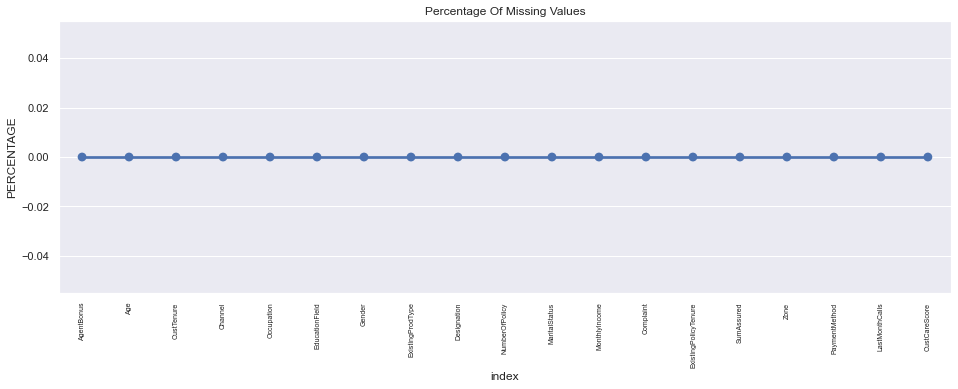

In [32]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize = 7)
plt.title('Percentage Of Missing Values')
plt.ylabel("PERCENTAGE")
plt.show()

In [33]:
df_null = df.isnull().sum()
df_null

AgentBonus              0
Age                     0
CustTenure              0
Channel                 0
Occupation              0
EducationField          0
Gender                  0
ExistingProdType        0
Designation             0
NumberOfPolicy          0
MaritalStatus           0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [34]:
df["AgentBonus"].value_counts().sort_index()

1605    2
1688    1
1702    1
1705    1
1707    1
       ..
9494    1
9521    1
9540    1
9600    1
9608    2
Name: AgentBonus, Length: 2909, dtype: int64

In [35]:
df["AgentBonus"].unique()

array([4409, 2214, 4273, ..., 4377, 2541, 3953], dtype=int64)

In [36]:
df["AgentBonus"].mean()

4077.838274336283

In [37]:
df["AgentBonus"].mode()

0    2581
dtype: int64

In [38]:
df["AgentBonus"].describe()

count    4520.000000
mean     4077.838274
std      1403.321711
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      9608.000000
Name: AgentBonus, dtype: float64

In [39]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(df["AgentBonus"], 0.5)))
print("  1% properties have a price lower than {0: .2f}".format(np.percentile(df["AgentBonus"], 1)))
print("  5% properties have a price lower than {0: .2f}".format(np.percentile(df["AgentBonus"], 5)))
print(" 10% properties have a price lower than {0: .2f}".format(np.percentile(df["AgentBonus"], 10)))
print(" 90% properties have a price lower than {0: .2f}".format(np.percentile(df["AgentBonus"], 90)))
print(" 95% properties have a price lower than {0: .2f}".format(np.percentile(df["AgentBonus"], 95)))
print(" 99% properties have a price lower than {0: .2f}".format(np.percentile(df["AgentBonus"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df["AgentBonus"], 99.5)))

0.5% properties have a price lower than  1755.19
  1% properties have a price lower than  1876.38
  5% properties have a price lower than  2158.00
 10% properties have a price lower than  2418.00
 90% properties have a price lower than  5917.10
 95% properties have a price lower than  6755.50
 99% properties have a price lower than  8234.44
99.5% properties have a price lower than  8757.22


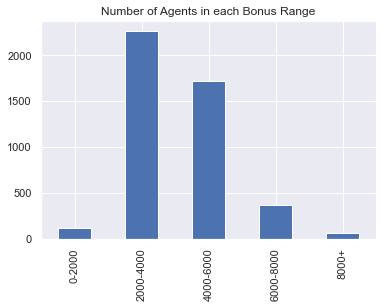

In [40]:
## Let's create a range variable to understand how many records we have in different slabs

bonus_range = pd.cut(df["AgentBonus"], 
                     bins=[0, 2000, 4000, 6000, 8000,  df["AgentBonus"].max()], 
                     labels=["0-2000", "2000-4000", "4000-6000", "6000-8000", "8000+"])
df["bonus_range"] = bonus_range 
df["bonus_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Agents in each Bonus Range")
plt.show()

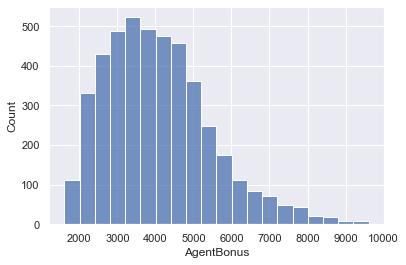

In [41]:
sns.histplot(df['AgentBonus'],bins=20);

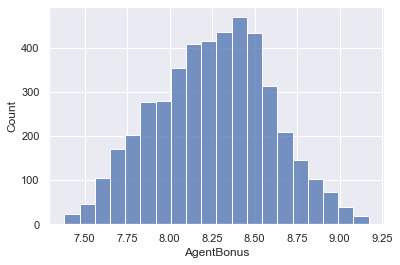

In [42]:
sns.histplot(np.log(df["AgentBonus"]),bins=20);

# Log transformation of the AgentBonus variable looks to be slightly more symmetrically distributed. We can use a log of the AgentBonus variable as our target variable in the regression model, to check if performance is better than the AgentBonus feature used without any transformation

In [43]:
df.corr()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
AgentBonus,1.000000,0.552344,0.555791,0.113023,0.079266,0.566688,0.014281,0.349091,0.844920,0.199708,0.023192
Age,0.552344,1.000000,0.323486,0.073452,0.046775,0.327965,0.020257,0.191474,0.466154,0.116929,0.034263
CustTenure,0.555791,0.323486,1.000000,0.082784,0.048699,0.318427,0.004282,0.192789,0.468206,0.117702,0.011497
ExistingProdType,0.113023,0.073452,0.082784,1.000000,0.149862,0.190571,-0.003486,0.059298,0.103697,0.033191,0.004110
NumberOfPolicy,0.079266,0.046775,0.048699,0.149862,1.000000,0.133535,-0.016014,0.050499,0.063781,0.075138,-0.001005
MonthlyIncome,0.566688,0.327965,0.318427,0.190571,0.133535,1.000000,-0.005197,0.142507,0.460657,0.337420,0.035621
Complaint,0.014281,0.020257,0.004282,-0.003486,-0.016014,-0.005197,1.000000,0.002661,-0.000150,-0.026320,-0.003814
ExistingPolicyTenure,0.349091,0.191474,0.192789,0.059298,0.050499,0.142507,0.002661,1.000000,0.301821,0.096547,-0.007073
SumAssured,0.844920,0.466154,0.468206,0.103697,0.063781,0.460657,-0.000150,0.301821,1.000000,0.157970,0.003327
LastMonthCalls,0.199708,0.116929,0.117702,0.033191,0.075138,0.337420,-0.026320,0.096547,0.157970,1.000000,0.006386


# SumAssured is highly correlated to Agent bonus

<AxesSubplot:ylabel='SumAssured'>

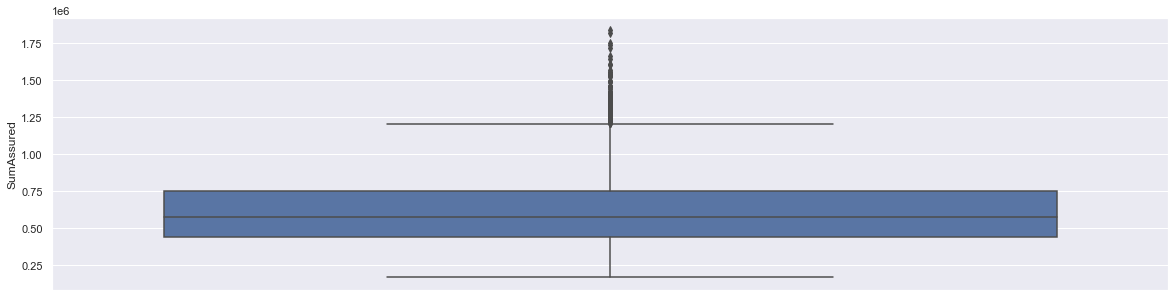

In [44]:
## Let's check if being a SumAssured has any bonus impact

plt.figure(figsize=(20,5))
sns.boxplot(y="SumAssured", data=df)
#chart=sns.boxplot(x="SumAssured", y="AgentBonus", data=df, palette="viridis")
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
#plt.title('SumAssured AgentBonus distribution')
#chart;

<AxesSubplot:ylabel='AgentBonus'>

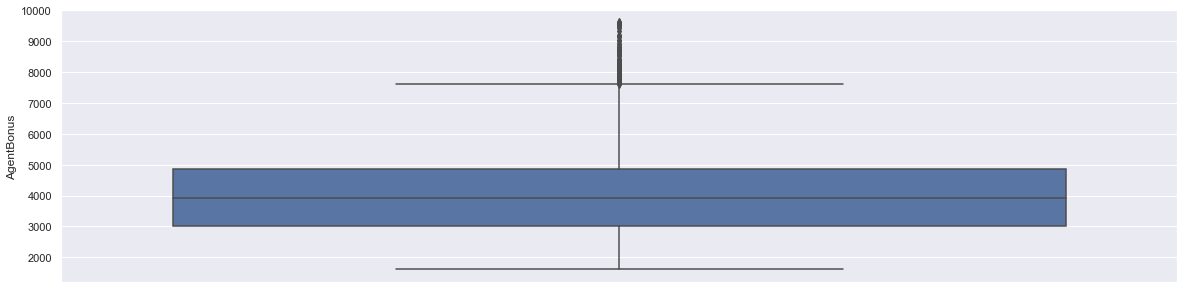

In [45]:
plt.figure(figsize=(20,5))
sns.boxplot(y="AgentBonus", data=df)

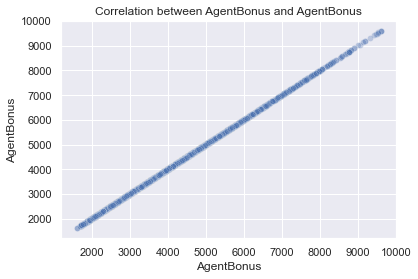

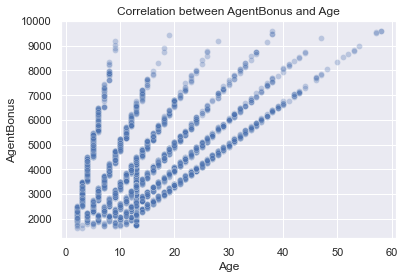

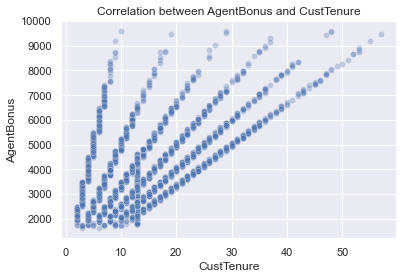

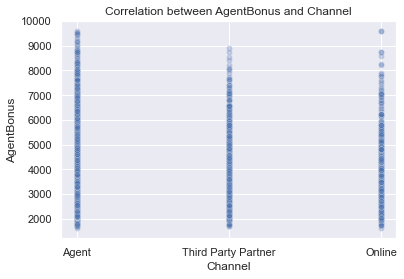

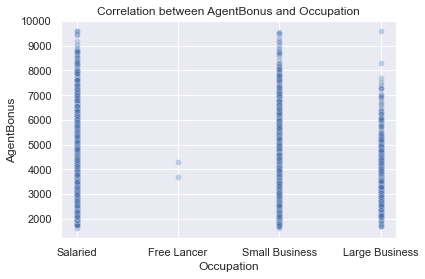

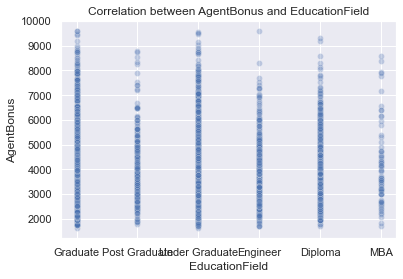

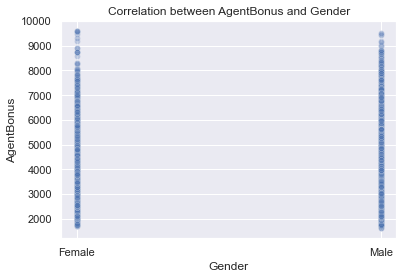

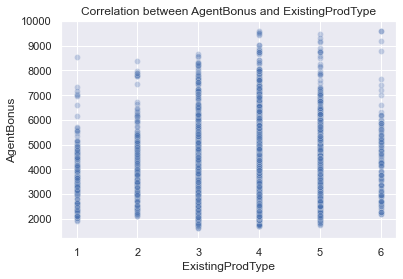

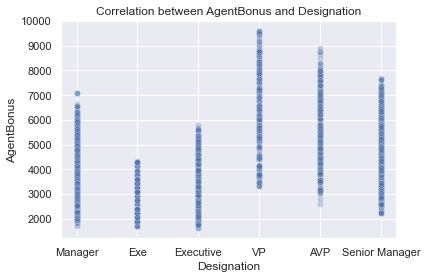

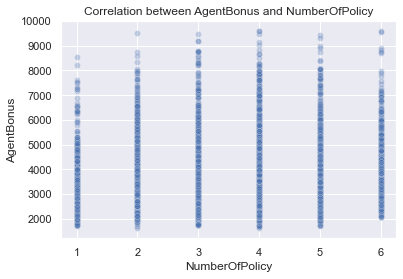

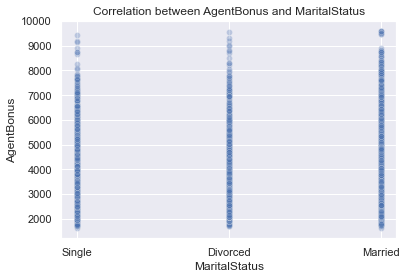

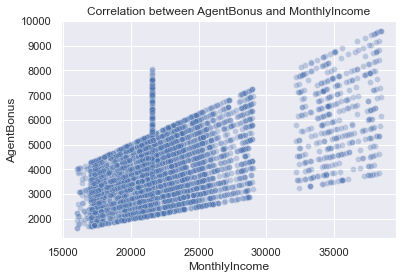

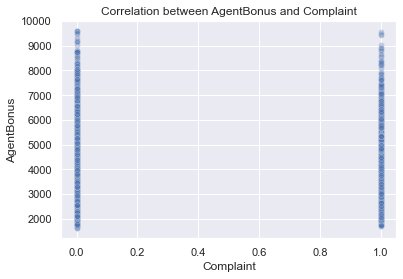

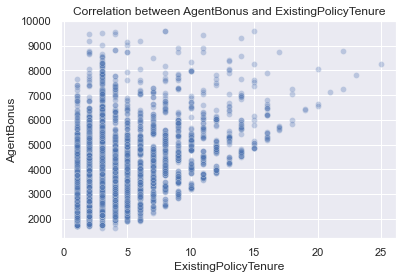

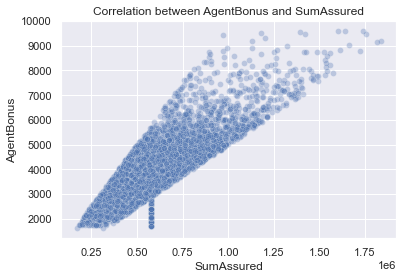

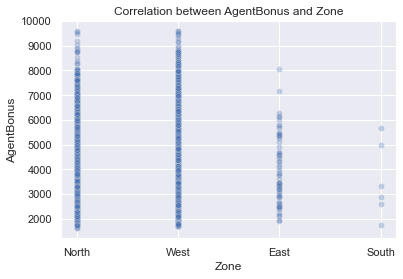

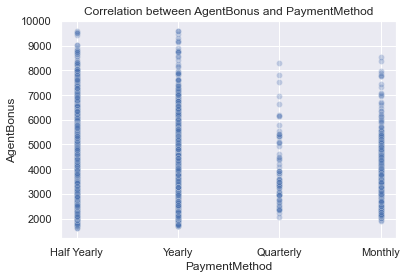

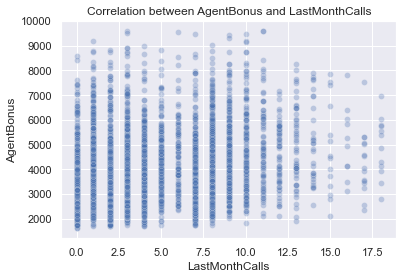

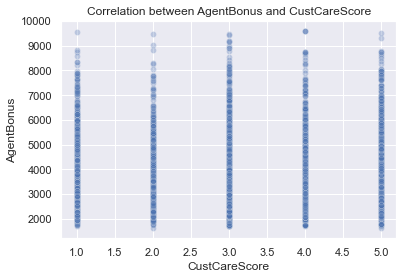

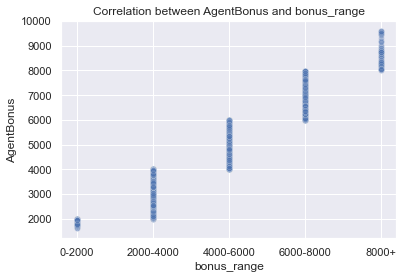

In [46]:
from scipy import stats
for col in df:
    sns.scatterplot(x=col, y="AgentBonus", data=df, alpha=0.3)
    plt.title("Correlation between AgentBonus and "+col)
    plt.show()

In [47]:
df['Channel'].value_counts()

Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64

In [48]:
df.describe()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
count,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4520.000000,4.520000e+03,4520.000000,4520.000000
mean,4077.838274,14.405752,14.395575,3.688938,3.569690,22823.253097,0.287168,4.084071,6.186020e+05,4.626991,3.066814
std,1403.321711,8.771646,8.742521,1.015769,1.449302,4764.892420,0.452491,3.285152,2.421172e+05,3.620132,1.375007
min,1605.000000,2.000000,2.000000,1.000000,1.000000,16009.000000,0.000000,1.000000,1.685360e+05,0.000000,1.000000
25%,3027.750000,8.000000,8.000000,3.000000,2.000000,19858.000000,0.000000,2.000000,4.444762e+05,2.000000,2.000000
50%,3911.500000,13.000000,13.000000,4.000000,4.000000,21606.000000,0.000000,3.000000,5.789765e+05,3.000000,3.000000
75%,4867.250000,19.000000,19.000000,4.000000,5.000000,24531.750000,1.000000,5.000000,7.500105e+05,8.000000,4.000000
max,9608.000000,58.000000,57.000000,6.000000,6.000000,38456.000000,1.000000,25.000000,1.838496e+06,18.000000,5.000000


In [49]:
df['Occupation'].value_counts()

Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: Occupation, dtype: int64

In [50]:
df['EducationField'].value_counts()

Graduate          1870
Under Graduate    1420
Diploma            496
Engineer           408
Post Graduate      252
MBA                 74
Name: EducationField, dtype: int64

In [51]:
df['Designation'].value_counts()

Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64

In [52]:
df['MaritalStatus'].value_counts()

Married     2268
Single      1448
Divorced     804
Name: MaritalStatus, dtype: int64

In [53]:
df['Gender'].value_counts()

Male      2688
Female    1832
Name: Gender, dtype: int64

In [54]:
df['PaymentMethod'].value_counts()

Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: PaymentMethod, dtype: int64

In [55]:
df['Zone'].value_counts()

West     2566
North    1884
East       64
South       6
Name: Zone, dtype: int64

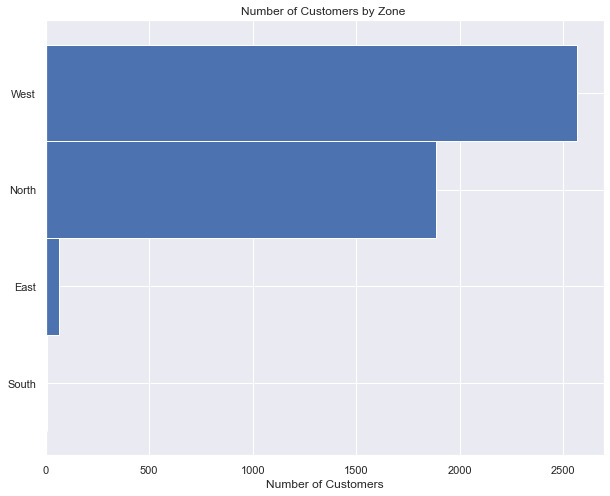

In [56]:
freq = df['Zone'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Number of Customers by Zone ")
plt.xlabel('Number of Customers')
plt.show()

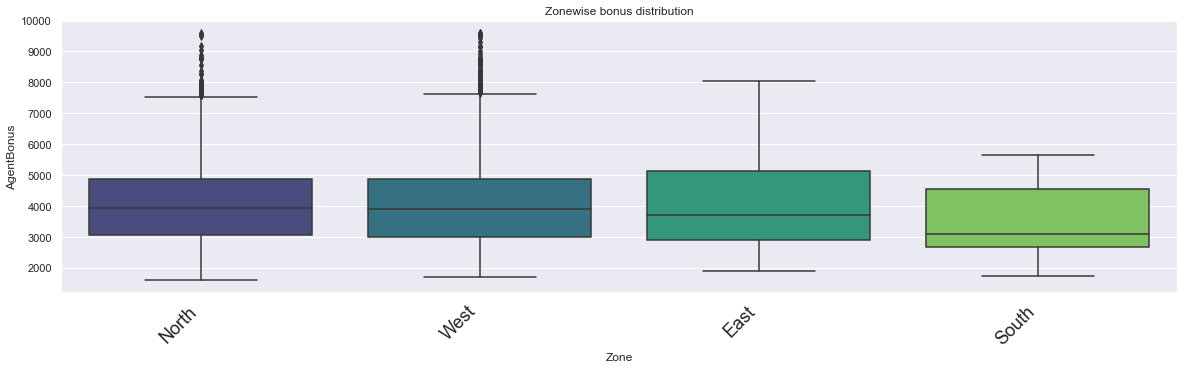

In [57]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Zone", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Zonewise bonus distribution')
chart;

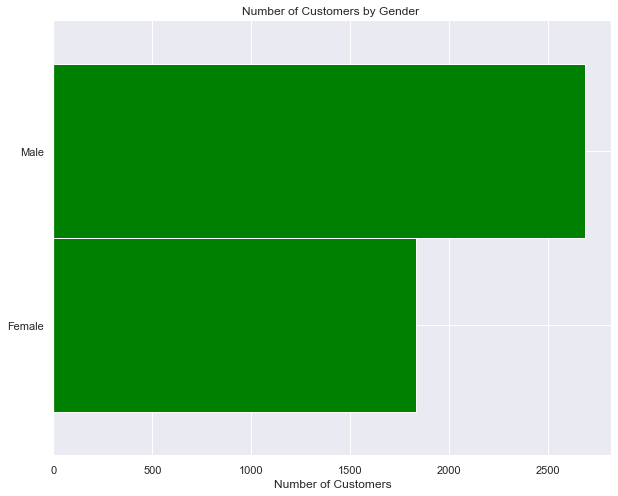

In [58]:
freq = df['Gender'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1, color = 'green')
plt.title("Number of Customers by Gender ")
plt.xlabel('Number of Customers')
plt.show()

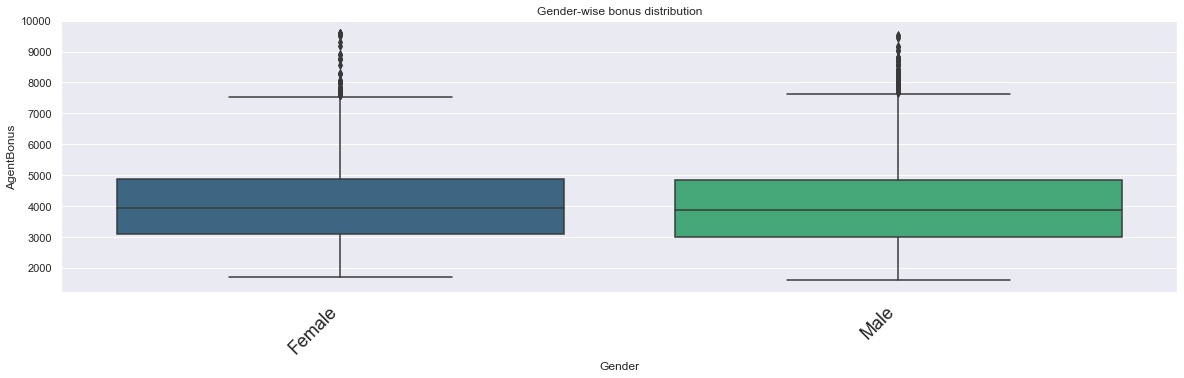

In [59]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Gender", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Gender-wise bonus distribution')
chart;

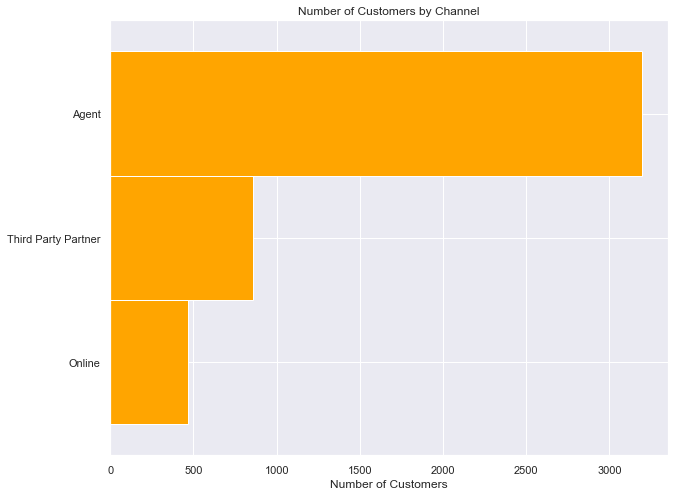

In [60]:
freq = df['Channel'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1,color = 'orange')
plt.title("Number of Customers by Channel")
plt.xlabel('Number of Customers')
plt.show()

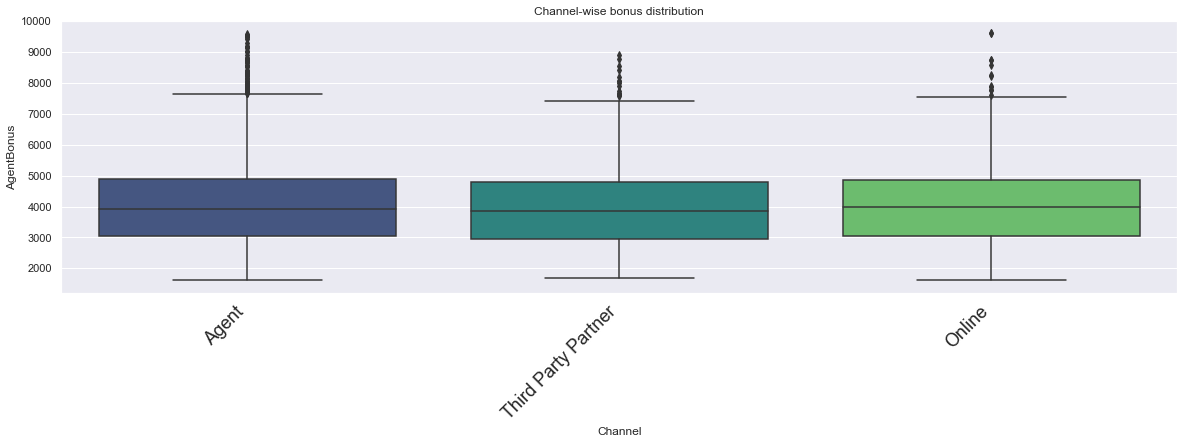

In [61]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Channel", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Channel-wise bonus distribution')
chart;

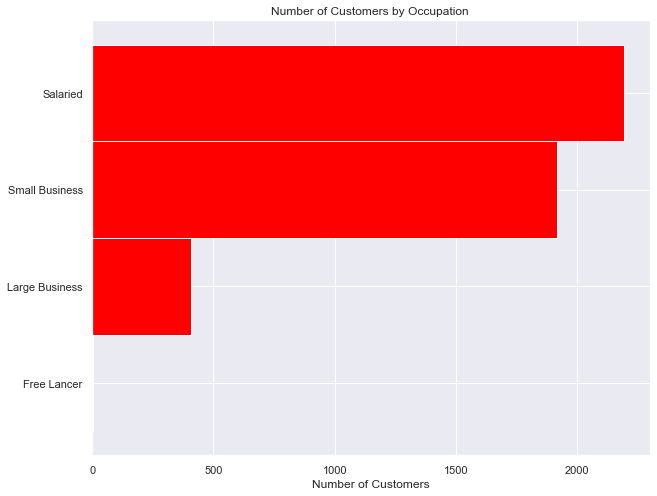

In [62]:
freq = df['Occupation'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1,color = 'red')
plt.title("Number of Customers by Occupation ")
plt.xlabel('Number of Customers')
plt.show()

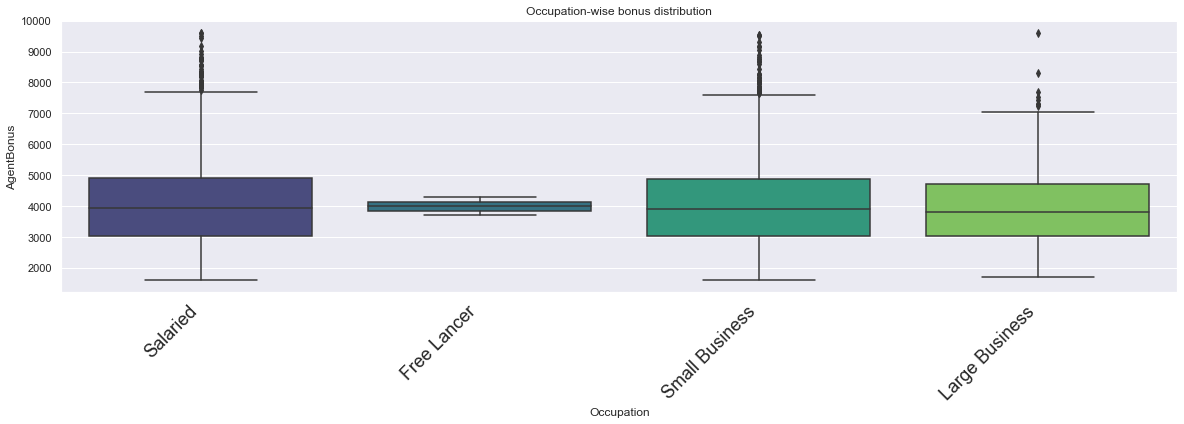

In [63]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Occupation", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Occupation-wise bonus distribution')
chart;

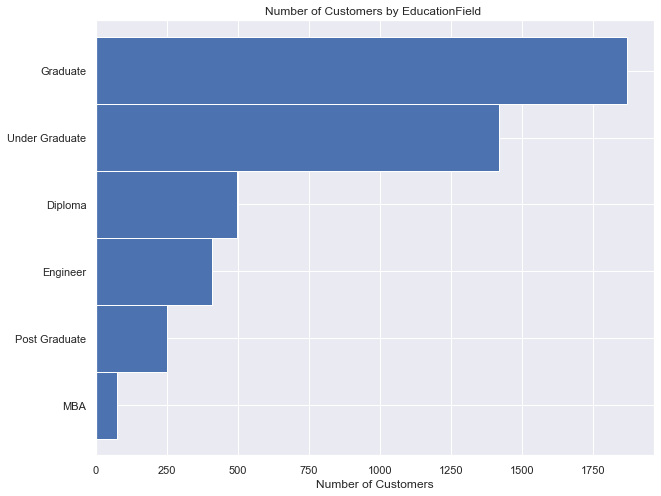

In [64]:
freq = df['EducationField'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Number of Customers by EducationField ")
plt.xlabel('Number of Customers')
plt.show()

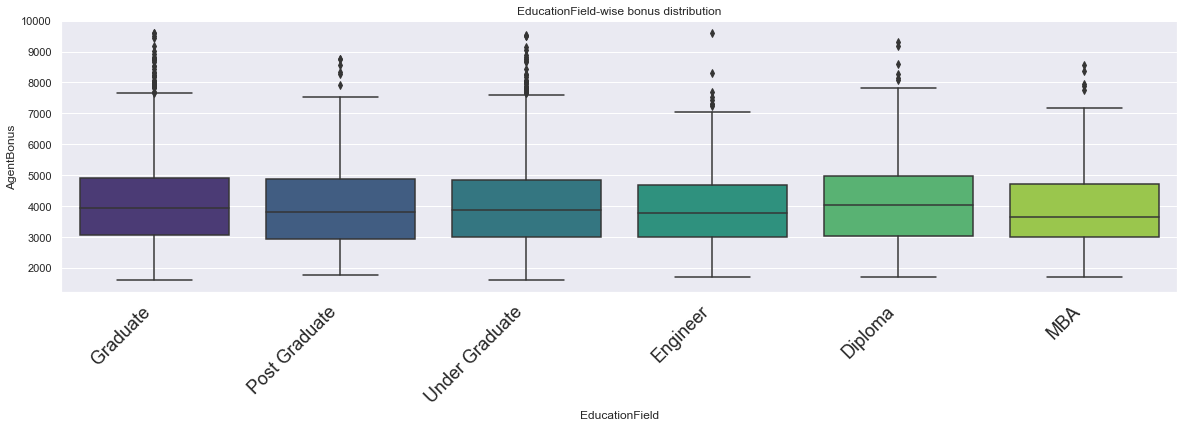

In [65]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="EducationField", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('EducationField-wise bonus distribution')
chart;

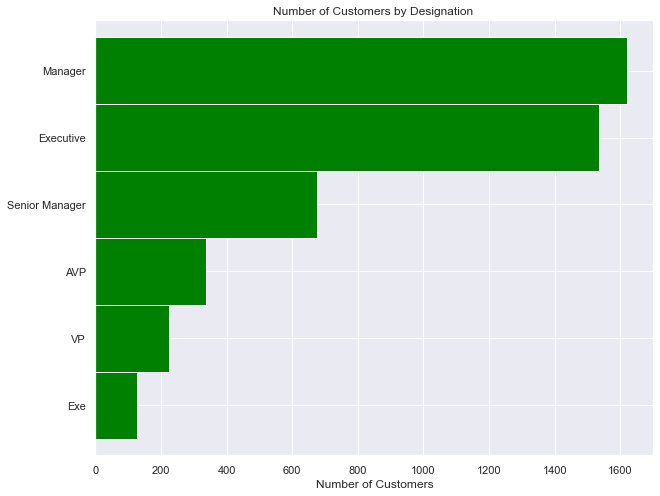

In [66]:
freq = df['Designation'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1, color = 'green')
plt.title("Number of Customers by Designation ")
plt.xlabel('Number of Customers')
plt.show()

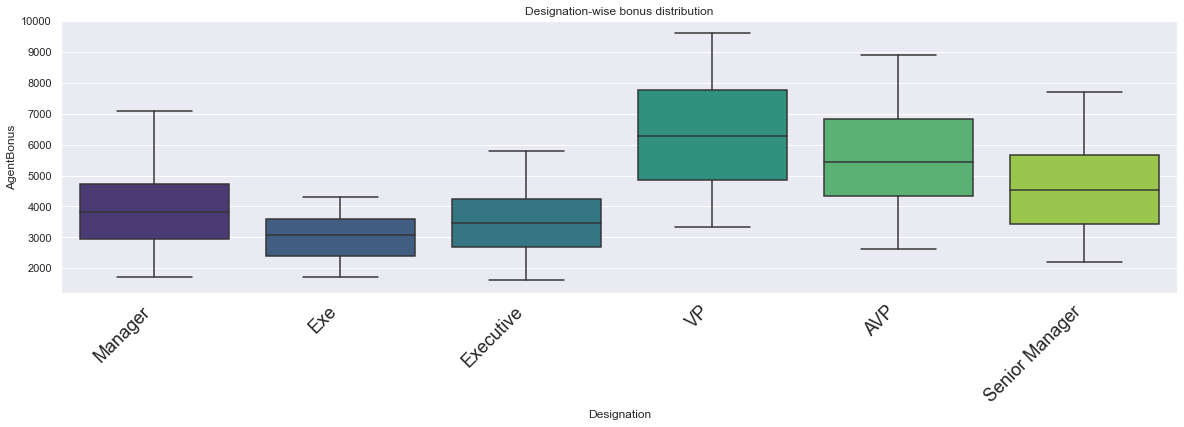

In [67]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Designation", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Designation-wise bonus distribution')
chart;

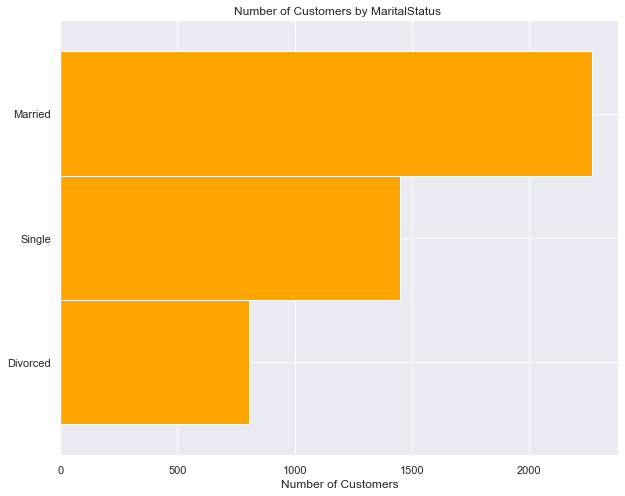

In [68]:
freq = df['MaritalStatus'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1, color = 'orange')
plt.title("Number of Customers by MaritalStatus ")
plt.xlabel('Number of Customers')
plt.show()

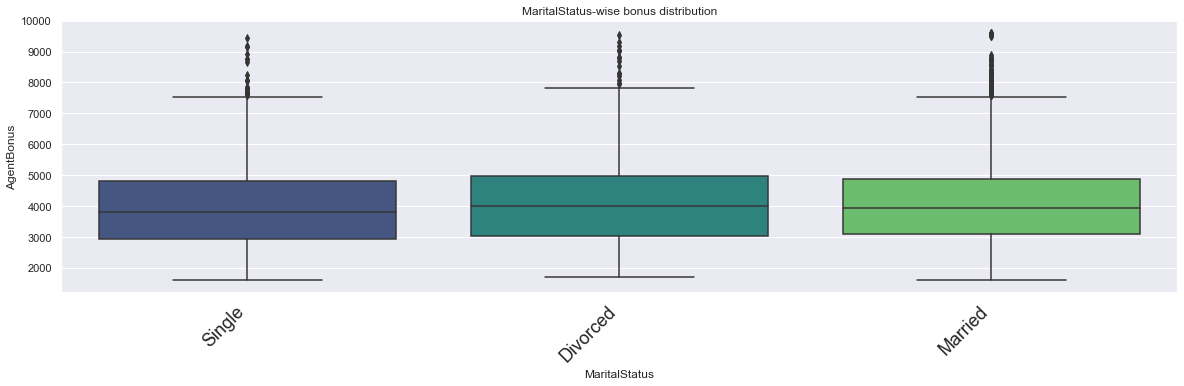

In [69]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="MaritalStatus", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('MaritalStatus-wise bonus distribution')
chart;

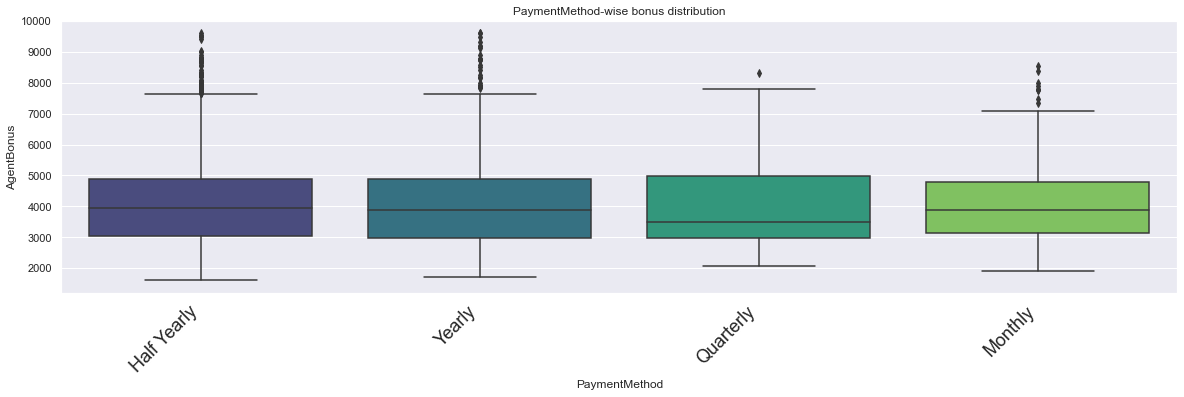

In [71]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="PaymentMethod", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('PaymentMethod-wise bonus distribution')
chart;

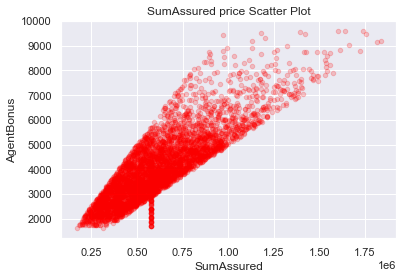

In [72]:
df.plot(kind='scatter', x='SumAssured', y='AgentBonus',alpha = 0.2,color = 'red')
plt.xlabel('SumAssured')              # label = name of label
plt.ylabel('AgentBonus')
plt.title('SumAssured price Scatter Plot')            # title = title of plot
plt.show()

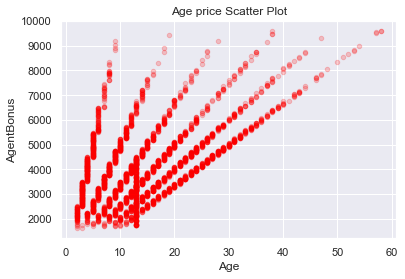

In [73]:
df.plot(kind='scatter', x='Age', y='AgentBonus',alpha = 0.2,color = 'red')
plt.xlabel('Age')              # label = name of label
plt.ylabel('AgentBonus')
plt.title('Age price Scatter Plot')            # title = title of plot
plt.show()

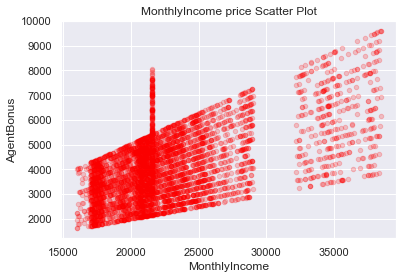

In [74]:
df.plot(kind='scatter', x='MonthlyIncome', y='AgentBonus',alpha = 0.2,color = 'red')
plt.xlabel('MonthlyIncome')              # label = name of label
plt.ylabel('AgentBonus')
plt.title('MonthlyIncome price Scatter Plot')            # title = title of plot
plt.show()

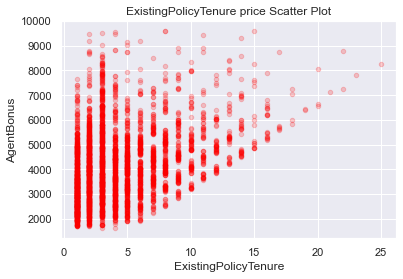

In [75]:
df.plot(kind='scatter', x='ExistingPolicyTenure', y='AgentBonus',alpha = 0.2,color = 'red')
plt.xlabel('ExistingPolicyTenure')              # label = name of label
plt.ylabel('AgentBonus')
plt.title('ExistingPolicyTenure price Scatter Plot')            # title = title of plot
plt.show()

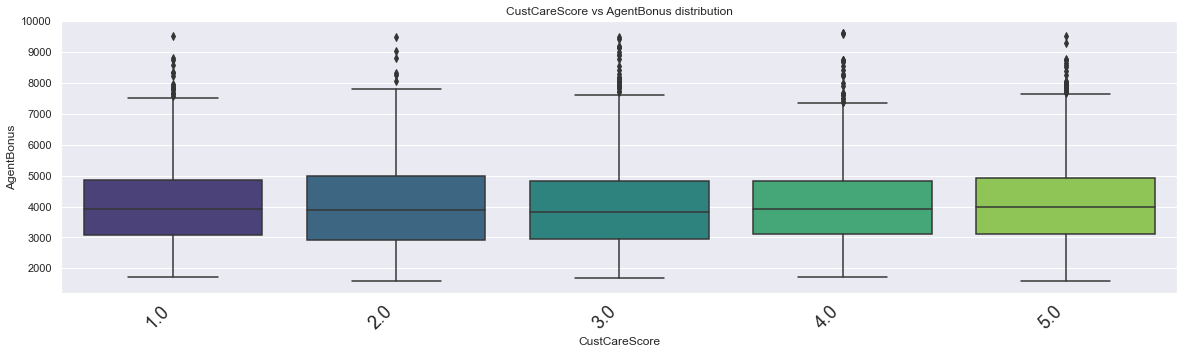

In [76]:
## Price does vary based on guests_included
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="CustCareScore", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('CustCareScore vs AgentBonus distribution')
chart;

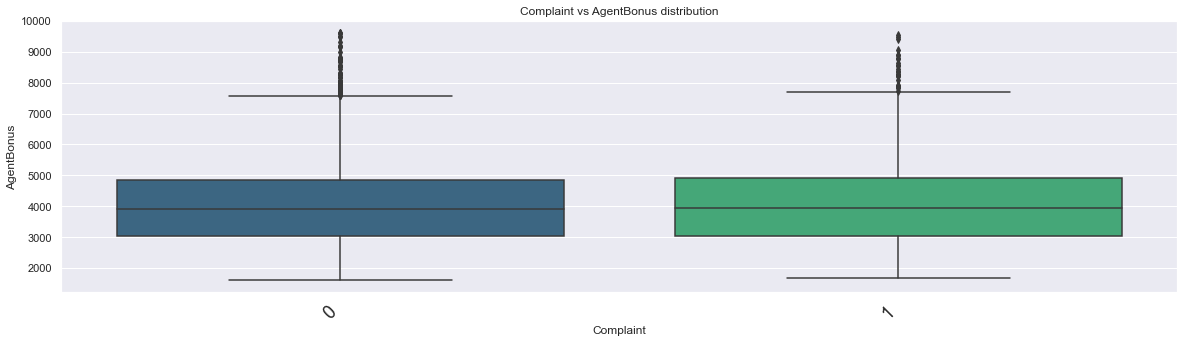

In [77]:
## Price does vary based on guests_included
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Complaint", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Complaint vs AgentBonus distribution')
chart;

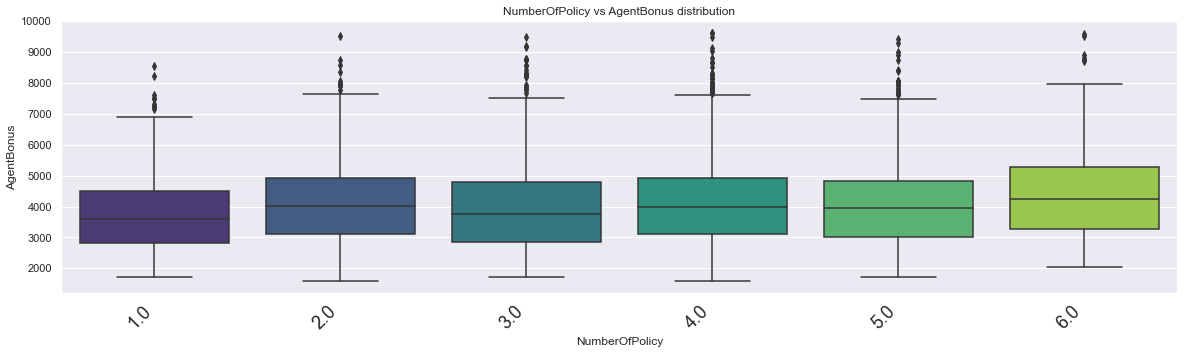

In [78]:
## Price does vary based on guests_included
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="NumberOfPolicy", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('NumberOfPolicy vs AgentBonus distribution')
chart;

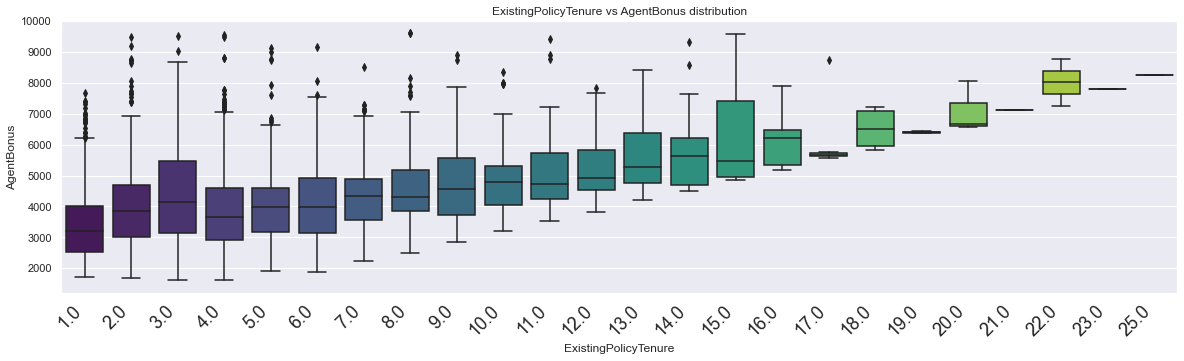

In [79]:
## Price does vary based on guests_included
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="ExistingPolicyTenure", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('ExistingPolicyTenure vs AgentBonus distribution')
chart;

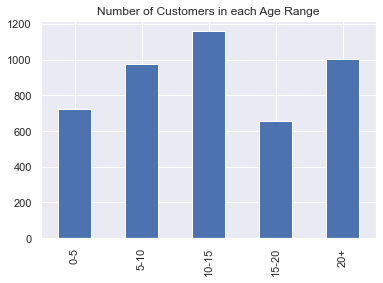

In [80]:
## Let's create a range variable to understand how many records we have in different slabs

age_range = pd.cut(df["Age"], 
                     bins=[0, 5, 10, 15, 20, df["Age"].max()], 
                     labels=["0-5", "5-10", "10-15", "15-20", "20+"])
df["AgeRange"] = age_range 
df["AgeRange"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Customers in each Age Range")
plt.show()

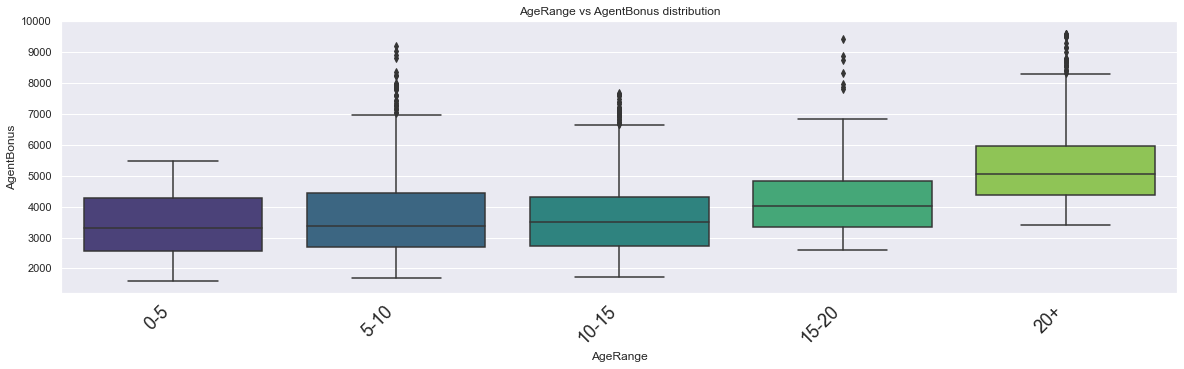

In [81]:
## Price does vary based on guests_included
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="AgeRange", y="AgentBonus", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('AgeRange vs AgentBonus distribution')
chart;

<AxesSubplot:>

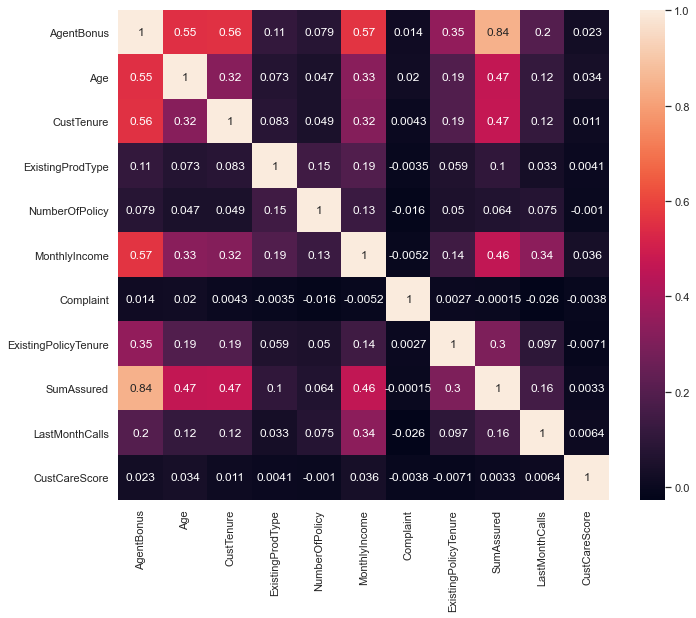

In [82]:
#sns.heatmap(df.corr(),
#            annot=True,mask=np.triu(df.corr(),+1));
plt.subplots(figsize=(11,9))
sns.heatmap(df.corr(), annot=True)  # plot the correlation coefficients as a heatmap

In [83]:
df.cov()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
AgentBonus,1.969312e+06,6799.049260,6818.763480,161.109009,161.214084,3.789259e+06,9.068360,1609.351506,2.870770e+08,1014.559046,44.750352
Age,6.799049e+03,76.941768,24.806930,0.654456,0.594642,1.370762e+04,0.080401,5.517551,9.900017e+05,3.713011,0.413247
CustTenure,6.818763e+03,24.806930,76.431669,0.735158,0.617038,1.326476e+04,0.016938,5.536995,9.910596e+05,3.725147,0.138202
ExistingProdType,1.611090e+02,0.654456,0.735158,1.031787,0.220621,9.223711e+02,-0.001602,0.197876,2.550269e+04,0.122051,0.005740
NumberOfPolicy,1.612141e+02,0.594642,0.617038,0.220621,2.100475,9.221620e+02,-0.010502,0.240433,2.238088e+04,0.394224,-0.002002
MonthlyIncome,3.789259e+06,13707.622222,13264.761775,922.371068,922.162043,2.270420e+07,-11.205913,2230.710959,5.314424e+08,5820.339615,233.381183
Complaint,9.068360e+00,0.080401,0.016938,-0.001602,-0.010502,-1.120591e+01,0.204748,0.003956,-1.646527e+01,-0.043115,-0.002373
ExistingPolicyTenure,1.609352e+03,5.517551,5.536995,0.197876,0.240433,2.230711e+03,0.003956,10.792222,2.400659e+05,1.148206,-0.031952
SumAssured,2.870770e+08,990001.745218,991059.649684,25502.686481,22380.880183,5.314424e+08,-16.465267,240065.926786,5.862076e+10,138460.350176,1107.542405
LastMonthCalls,1.014559e+03,3.713011,3.725147,0.122051,0.394224,5.820340e+03,-0.043115,1.148206,1.384604e+05,13.105357,0.031788


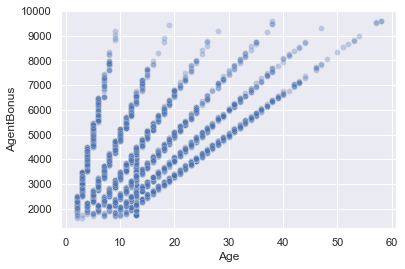

In [84]:
sns.scatterplot(x='Age', y="AgentBonus", data=df, alpha=0.3);

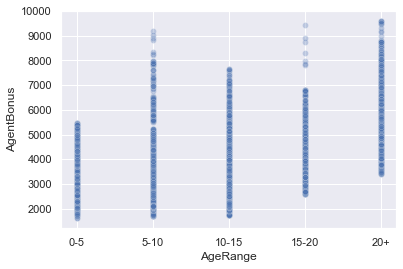

In [85]:
sns.scatterplot(x='AgeRange', y="AgentBonus", data=df, alpha=0.3);

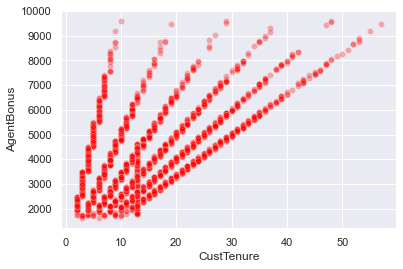

In [86]:
sns.scatterplot(x='CustTenure', y="AgentBonus", data=df, alpha=0.3, color = 'red');

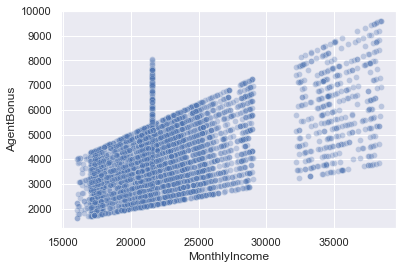

In [87]:
sns.scatterplot(x='MonthlyIncome', y="AgentBonus", data=df, alpha=0.3);

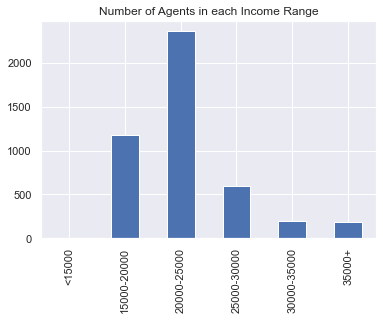

In [88]:
## Let's create a range variable to understand how many records we have in different slabs

income_range = pd.cut(df["MonthlyIncome"], 
                     bins=[0,15000, 20000, 25000, 30000, 35000,  df["MonthlyIncome"].max()], 
                     labels=["<15000", "15000-20000", "20000-25000", "25000-30000", "30000-35000","35000+" ])
df["income_range"] = income_range 
df["income_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Agents in each Income Range")
plt.show()

# Outlier Treatment

In [89]:
# Outlier treatment function
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [90]:
df.drop(columns=['bonus_range','AgeRange','income_range'],  inplace=True)

In [91]:
#All continous variables in cname
cname = df.columns[(df.dtypes=="float64")|(df.dtypes=="int64")].tolist()
print(cname)

#All categorical var in cat_names and removing target var
cat_names = df.select_dtypes(exclude=np.number).columns.tolist()
cat_names

['AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy', 'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']


['Channel',
 'Occupation',
 'EducationField',
 'Gender',
 'Designation',
 'MaritalStatus',
 'Zone',
 'PaymentMethod']

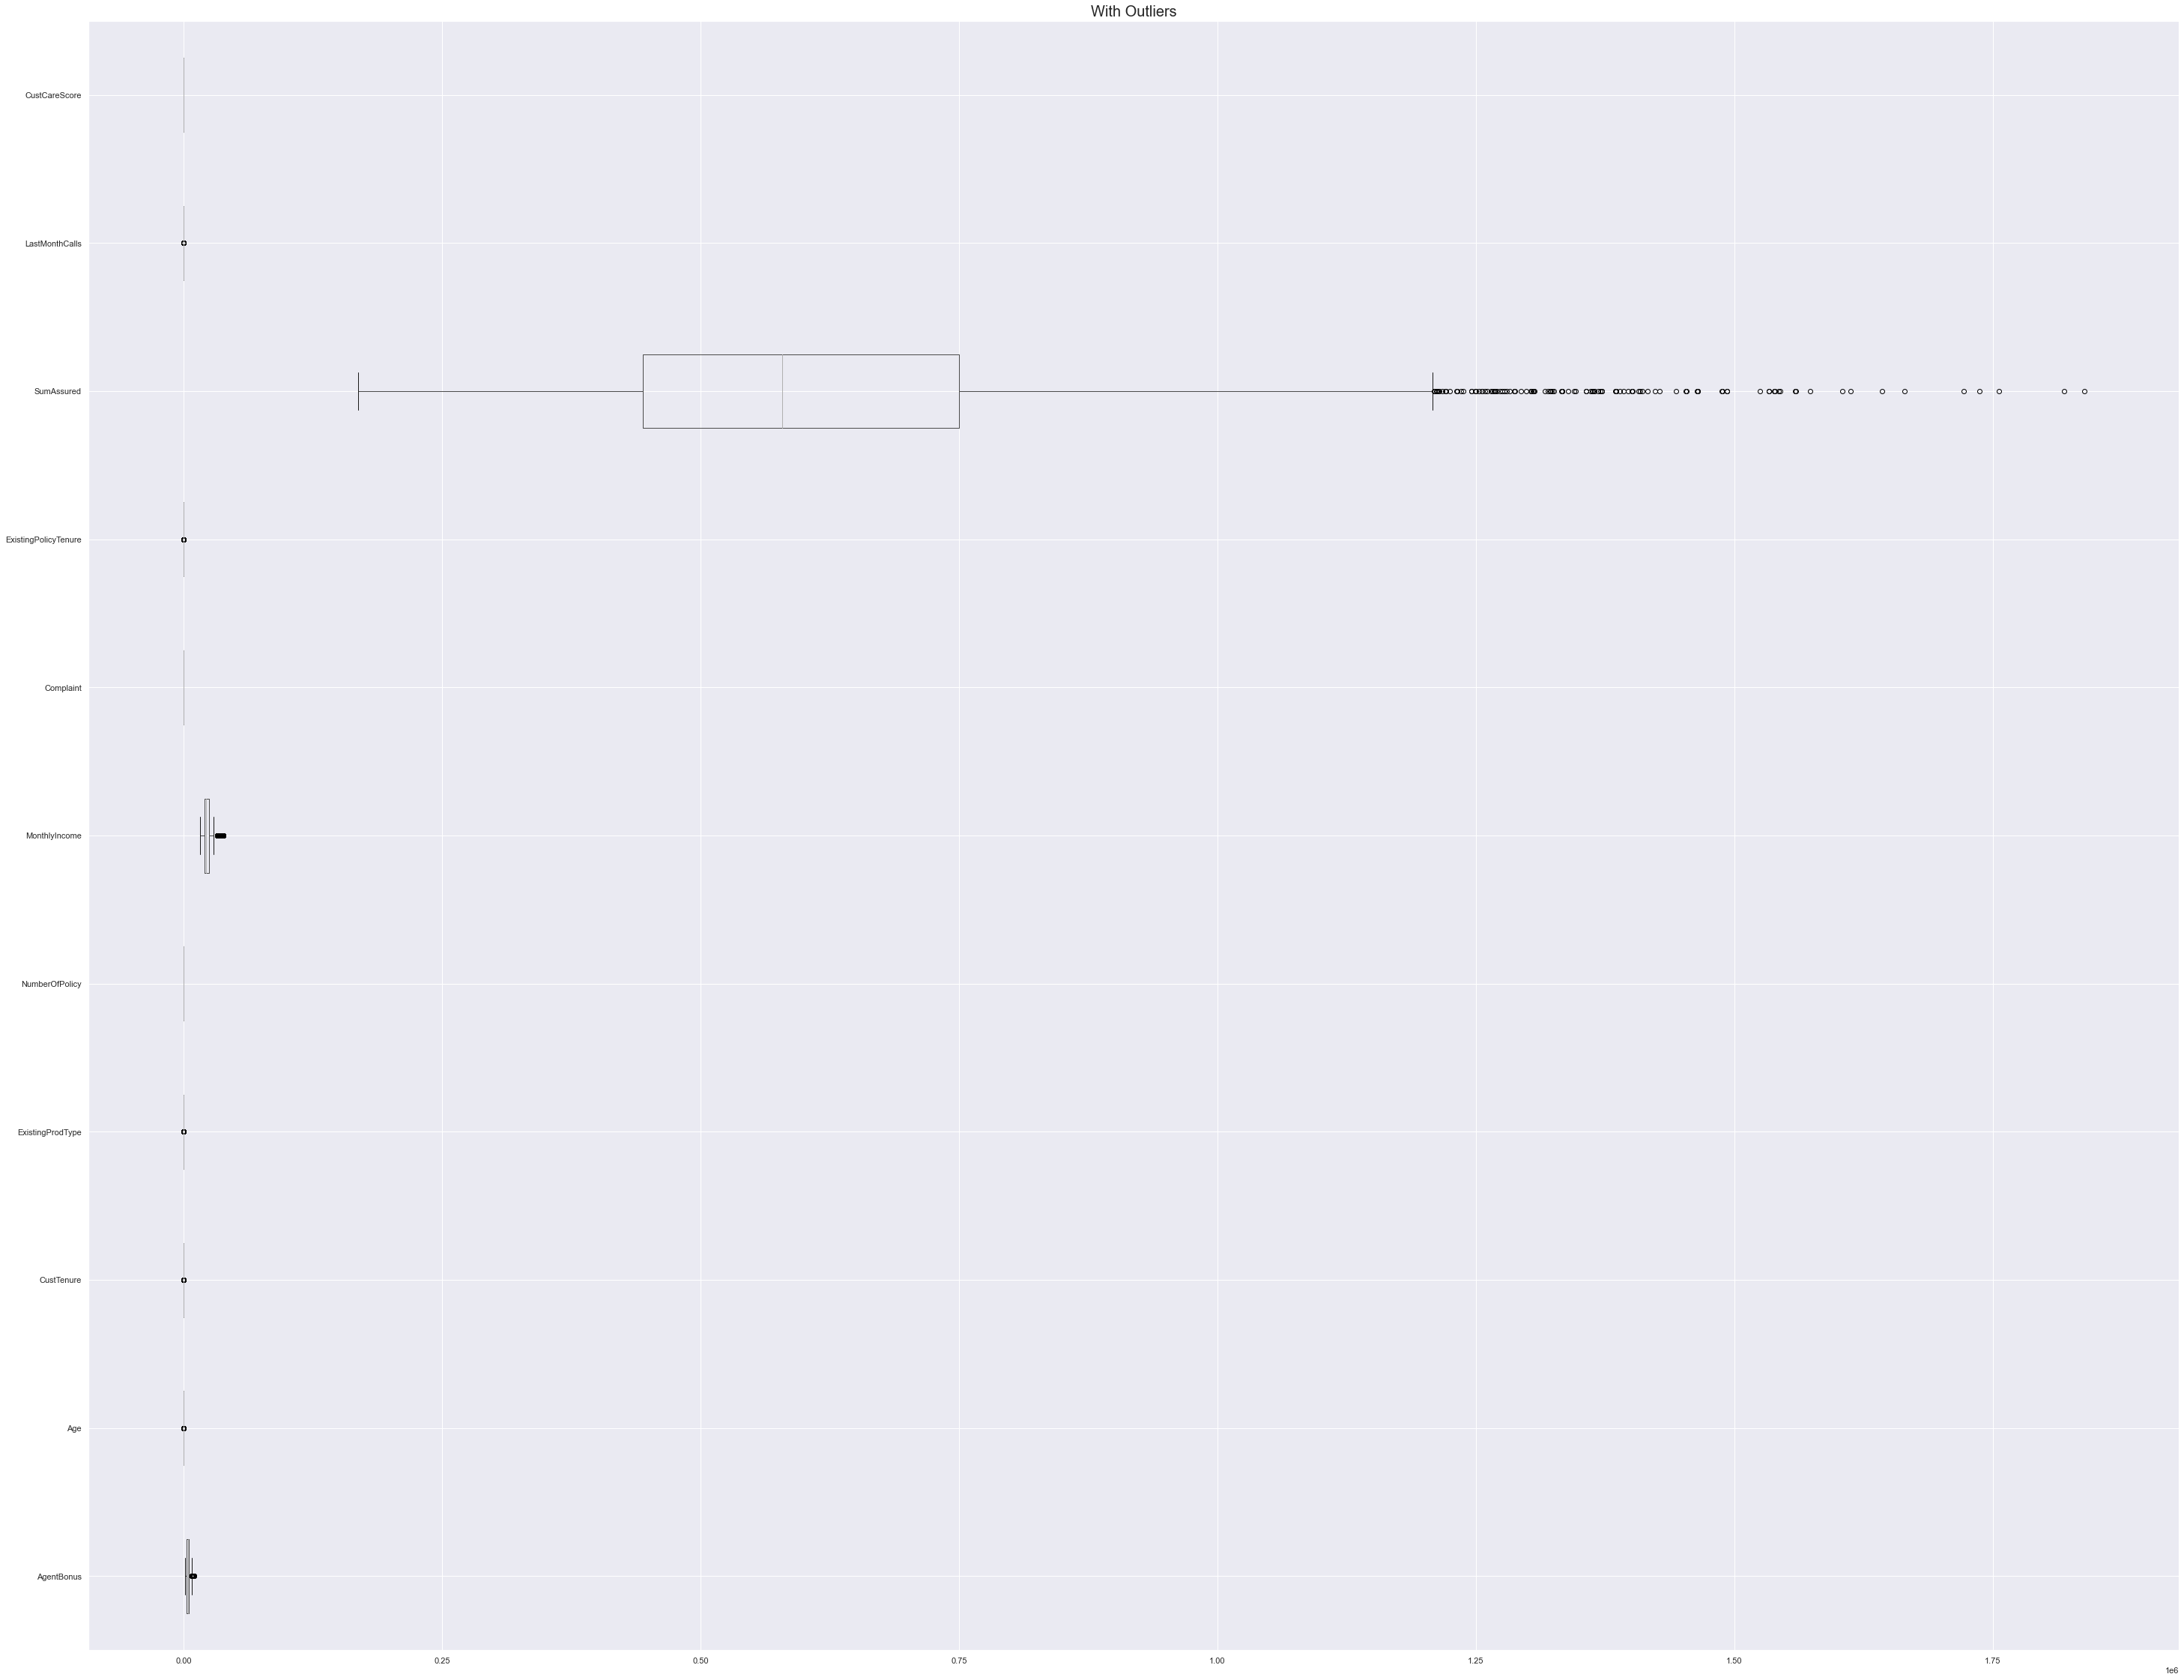

In [92]:
# construct box plot for continuous variables
plt.figure(figsize=(50,40))
df[cname].boxplot(vert=0)
plt.title('With Outliers',fontsize=20)
plt.show()

In [93]:
no_out_df=df.copy()
for col in cname:
    lr,ur = remove_outlier(no_out_df[col])
    no_out_df[col]=np.where(no_out_df[col]>ur,ur,no_out_df[col])
    no_out_df[col]=np.where(no_out_df[col]<lr,lr,no_out_df[col])

Text(0.5, 1.0, 'After Outlier Removal')

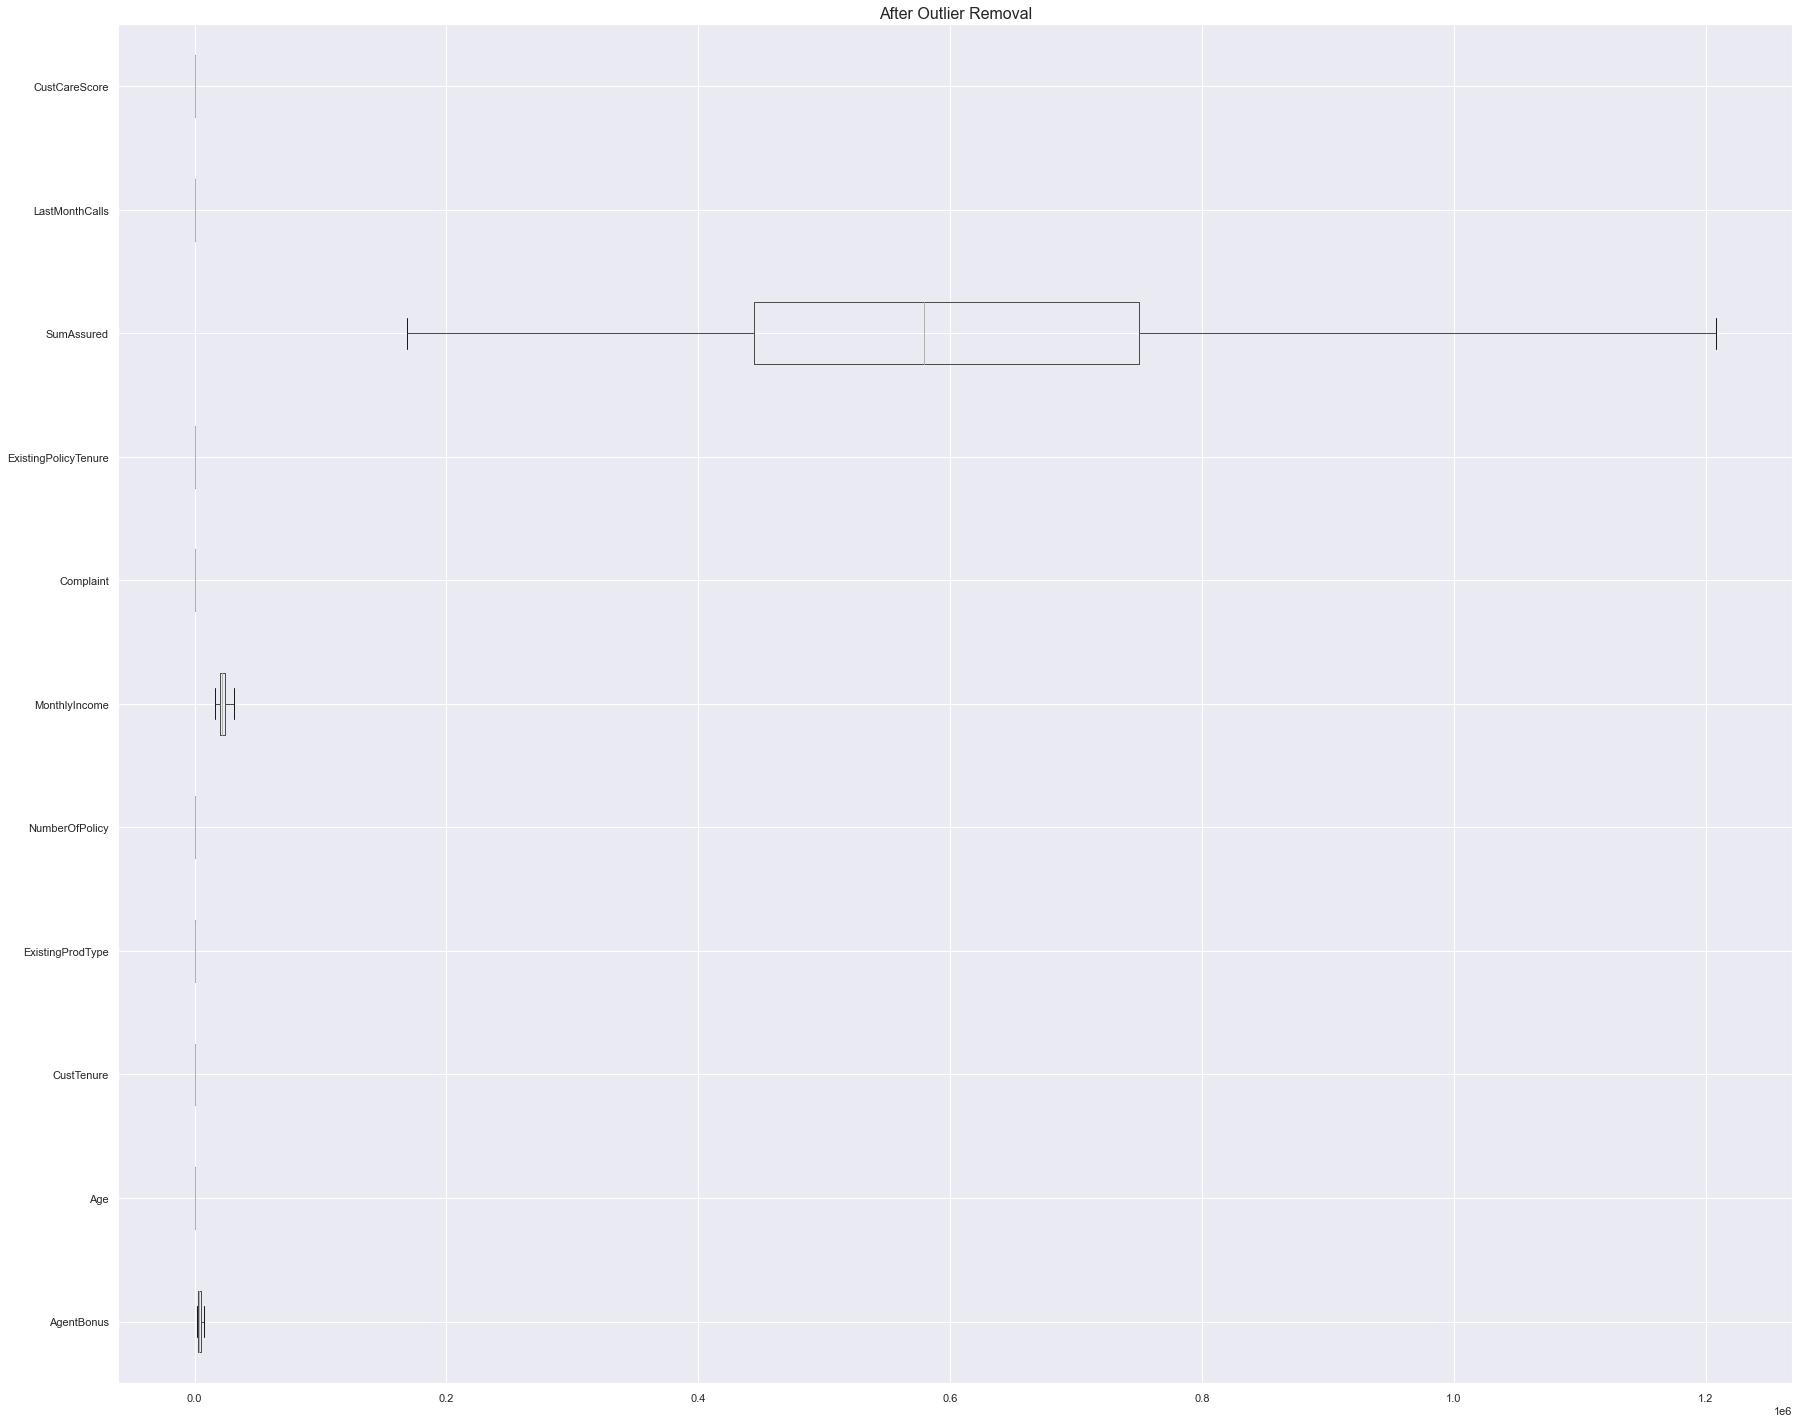

In [94]:
plt.figure(figsize=(30,25))
no_out_df[cname].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
#plt.show()

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
X = StandardScaler()

In [97]:
df

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Single,17090.0,1,2.0,578976.5,North,Yearly,0,3.0
3,1791,11.0,13.0,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,6.0,13.0,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,21606.0,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0


In [98]:
#for feature in cat_names: 
#    if df[feature].dtype == 'object':
#        df[feature] = pd.Categorical(df[feature]).codes
df = pd.get_dummies(df, columns=cat_names,drop_first=True)

In [99]:
from scipy.stats import zscore

scaled_df= df.apply(zscore)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   AgentBonus                     4520 non-null   int64  
 1   Age                            4520 non-null   float64
 2   CustTenure                     4520 non-null   float64
 3   ExistingProdType               4520 non-null   int64  
 4   NumberOfPolicy                 4520 non-null   float64
 5   MonthlyIncome                  4520 non-null   float64
 6   Complaint                      4520 non-null   int64  
 7   ExistingPolicyTenure           4520 non-null   float64
 8   SumAssured                     4520 non-null   float64
 9   LastMonthCalls                 4520 non-null   int64  
 10  CustCareScore                  4520 non-null   float64
 11  Channel_Online                 4520 non-null   uint8  
 12  Channel_Third Party Partner    4520 non-null   u

# scaled_df = X.fit_transform(df)

In [102]:
scaled_df

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Exe,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,0.236010,0.865868,-1.189214,-0.678318,-1.083186,-0.384155,1.575525,-0.634461,0.777226,0.103049,-0.775947,-0.339851,-0.484044,-0.314995,1.030555,-0.858560,-0.314995,1.190425,-0.129012,-0.242990,-0.676805,-1.211301,-0.170028,-0.717104,1.337955,-0.419355,-0.229416,-1.003546,1.456553,1.182857,-0.036458,-1.145951,-0.291502,-0.130774,-0.681674
1,-1.328309,-0.388311,-1.418006,0.306267,0.296941,-0.565291,-0.634709,-0.330028,-1.338756,0.655576,-0.048597,-0.339851,2.065930,-0.314995,1.030555,-0.858560,-0.314995,1.190425,-0.129012,-0.242990,-0.676805,0.825559,-0.170028,-0.717104,1.337955,-0.419355,-0.229416,-1.003546,-0.686552,1.182857,-0.036458,-1.145951,-0.291502,-0.130774,1.466977
2,0.139087,1.321933,-1.189214,0.306267,-0.393123,-1.203361,1.575525,-0.634461,-0.163681,-1.278269,-0.048597,-0.339851,-0.484044,-0.314995,-0.970351,-0.858560,-0.314995,-0.840036,-0.129012,4.115399,-0.676805,0.825559,5.881373,-0.717104,-0.747409,-0.419355,-0.229416,-1.003546,1.456553,1.182857,-0.036458,-1.145951,-0.291502,-0.130774,1.466977
3,-1.629770,-0.388311,-0.159648,-0.678318,-0.393123,-1.031460,1.575525,-0.634461,-1.445604,-1.278269,1.406102,-0.339851,2.065930,-0.314995,1.030555,-0.858560,-0.314995,1.190425,-0.129012,-0.242990,-0.676805,-1.211301,-0.170028,1.394498,-0.747409,-0.419355,-0.229416,-1.003546,-0.686552,-0.845411,-0.036458,0.872638,-0.291502,-0.130774,-0.681674
4,-0.800217,-0.958393,-0.159648,-0.678318,0.296941,-0.914131,-0.634709,-0.025594,-1.041747,-0.725742,1.406102,-0.339851,-0.484044,-0.314995,-0.970351,1.164741,-0.314995,-0.840036,-0.129012,-0.242990,1.477531,0.825559,-0.170028,1.394498,-0.747409,-0.419355,-0.229416,-1.003546,-0.686552,-0.845411,-0.036458,0.872638,-0.291502,-0.130774,-0.681674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-0.088969,-1.186425,-0.731629,0.306267,-1.083186,0.741284,-0.634709,-0.634461,0.073819,1.208103,-1.503296,-0.339851,-0.484044,-0.314995,-0.970351,1.164741,-0.314995,1.190425,-0.129012,-0.242990,-0.676805,0.825559,-0.170028,-0.717104,-0.747409,2.384615,-0.229416,-1.003546,1.456553,-0.845411,-0.036458,0.872638,-0.291502,-0.130774,1.466977
4516,-0.811620,-0.616344,-0.617233,-1.662902,-1.083186,-0.384574,-0.634709,-0.330028,-1.329210,-1.002006,-0.048597,-0.339851,-0.484044,-0.314995,1.030555,-0.858560,-0.314995,-0.840036,-0.129012,-0.242990,1.477531,-1.211301,-0.170028,1.394498,-0.747409,-0.419355,-0.229416,0.996466,-0.686552,1.182857,-0.036458,-1.145951,-0.291502,-0.130774,1.466977
4517,-0.203709,0.979884,0.984313,1.290851,0.987005,-0.255491,-0.634709,-0.634461,0.201449,-0.173215,-1.503296,-0.339851,-0.484044,-0.314995,1.030555,-0.858560,3.174655,-0.840036,-0.129012,-0.242990,-0.676805,-1.211301,-0.170028,-0.717104,-0.747409,-0.419355,-0.229416,-1.003546,1.456553,1.182857,-0.036458,-1.145951,-0.291502,-0.130774,-0.681674
4518,0.526069,-0.502328,-0.502837,0.306267,-1.083186,-0.578304,-0.634709,0.583273,1.344113,-1.002006,1.406102,2.942468,-0.484044,-0.314995,-0.970351,1.164741,-0.314995,1.190425,-0.129012,-0.242990,-0.676805,-1.211301,-0.170028,1.394498,-0.747409,-0.419355,-0.229416,-1.003546,1.456553,-0.845411,-0.036458,0.872638,-0.291502,-0.130774,-0.681674


In [103]:
df

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Exe,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409,22.0,4.0,3,2.0,20993.0,1,2.0,806761.0,5,2.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
1,2214,11.0,2.0,4,4.0,20130.0,0,3.0,294502.0,7,3.0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
2,4273,26.0,4.0,4,3.0,17090.0,1,2.0,578976.5,0,3.0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1
3,1791,11.0,13.0,3,3.0,17909.0,1,2.0,268635.0,0,5.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,2955,6.0,13.0,3,4.0,18468.0,0,4.0,366405.0,2,5.0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,3953,4.0,8.0,4,2.0,26355.0,0,2.0,636473.0,9,1.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
4516,2939,9.0,9.0,2,2.0,20991.0,0,3.0,296813.0,1,3.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
4517,3792,23.0,23.0,5,5.0,21606.0,0,2.0,667371.0,4,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4518,4816,10.0,10.0,4,2.0,20068.0,0,6.0,943999.0,1,5.0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [104]:
cov_matrix = np.cov(scaled_df.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00022129e+00  5.52466509e-01  5.55914247e-01 ... -8.68720331e-03
  -8.74510181e-03 -8.18575787e-03]
 [ 5.52466509e-01  1.00022129e+00  3.23557414e-01 ...  8.79326307e-04
   7.68499034e-03  7.38095236e-03]
 [ 5.55914247e-01  3.23557414e-01  1.00022129e+00 ... -1.14980907e-02
  -1.97010911e-02 -3.93008587e-03]
 ...
 [-8.68720331e-03  8.79326307e-04 -1.14980907e-02 ...  1.00022129e+00
  -3.81292149e-02 -1.98753464e-01]
 [-8.74510181e-03  7.68499034e-03 -1.97010911e-02 ... -3.81292149e-02
   1.00022129e+00 -8.91646028e-02]
 [-8.18575787e-03  7.38095236e-03 -3.93008587e-03 ... -1.98753464e-01
  -8.91646028e-02  1.00022129e+00]]


In [105]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [3.79451749e+00 3.20855610e+00 2.31059807e+00 2.06341378e+00
 1.94793092e+00 1.67042542e+00 1.58802281e+00 7.49061134e-04
 2.46621967e-02 2.80642484e-02 5.03018207e-02 4.28193698e-02
 1.25809919e-01 1.52751083e-01 2.79123158e-01 3.05317918e-01
 2.97177481e-01 5.07059653e-01 6.64463202e-01 1.27461957e+00
 7.00645098e-01 1.22669205e+00 1.19838224e+00 1.16053227e+00
 7.63975356e-01 8.13956286e-01 8.29716857e-01 1.09375028e+00
 8.95725076e-01 1.06691596e+00 9.30864626e-01 9.49509337e-01
 1.04123756e+00 1.01539374e+00 9.84065068e-01]
Eigen Vectors 
 %s [[ 0.45237219  0.01517699 -0.0181631  ... -0.01205252 -0.02722782
   0.00392377]
 [ 0.31195074  0.01587582 -0.01516285 ... -0.0342978  -0.02133003
  -0.0397793 ]
 [ 0.31138038  0.01361653 -0.00718656 ...  0.01256985 -0.07818545
  -0.00172299]
 ...
 [-0.0387375   0.0036899   0.16576068 ...  0.17932336 -0.03923713
   0.10230862]
 [-0.01344512  0.00076899  0.06259944 ... -0.61504789  0.24511162
  -0.23502232]
 [ 0.02441971  0

In [106]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 10.83907998  20.00435496  26.60460318  32.49876681  38.06305242
  42.83464059  47.3708448   51.01180929  54.51586831  57.93906005
  61.25413296  64.3784424   67.4260993   70.40040559  73.30088872
  76.11188116  78.82416479  81.48318959  84.0418379   86.41193302
  88.73700789  90.91931171  92.92071196  94.81875824  96.26717958
  97.1393235   97.98821417  98.78553246  99.22186758  99.58124496
  99.72493265  99.84724664  99.92741247  99.9978603  100.        ]


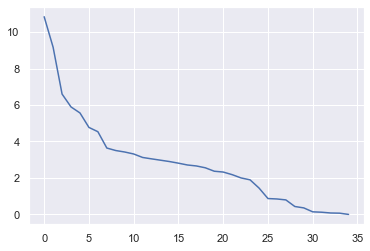

In [107]:
plt.plot(var_exp)

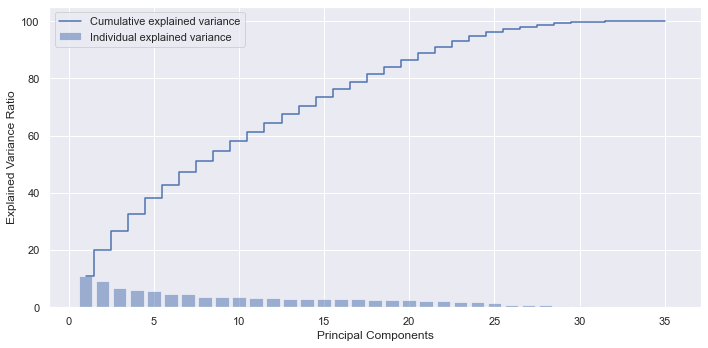

In [108]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [109]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 18 to 4)

pca = PCA(n_components=5)
data_reduced = pca.fit_transform(scaled_df)
data_reduced.transpose()

array([[-0.15534127, -1.81152561, -1.31722085, ...,  0.37720728,
        -0.345225  ,  0.26753463],
       [-1.88925042, -1.83007197, -0.41906599, ..., -0.69035217,
         0.08630408,  0.0882461 ],
       [-0.69077934, -0.51846599,  0.35539171, ...,  2.2400937 ,
         0.08296675, -0.96193646],
       [ 0.89252094,  0.19278019, -0.11822886, ...,  0.96084063,
        -1.6790074 ,  0.86128105],
       [-0.54629398, -1.90203475, -1.85047993, ..., -1.45433386,
         0.39490144, -1.52215013]])

In [110]:
pca.components_

array([[ 4.52303520e-01,  3.12154887e-01,  3.11311313e-01,
         1.07020067e-01,  6.93523738e-02,  4.01866175e-01,
        -1.74995215e-03,  1.94515071e-01,  4.10950791e-01,
         1.96427120e-01,  1.33959731e-02,  4.61405255e-03,
        -3.00258605e-02, -4.24784831e-02,  1.23378257e-03,
         2.37014391e-02, -4.47046385e-02, -7.89137702e-04,
         8.38723960e-03, -5.34809884e-03,  4.17087429e-03,
        -2.15407106e-02, -8.12332195e-02, -2.48954319e-01,
        -2.86944549e-02,  1.34533034e-01,  2.74326178e-01,
         5.04091998e-02, -6.54693052e-02,  4.21589405e-03,
        -6.56879856e-03, -3.08165808e-03, -3.88589128e-02,
        -1.39851912e-02,  2.44141703e-02],
       [-1.51036504e-02, -1.58662477e-02, -1.34746272e-02,
        -5.34880766e-04,  3.23864656e-02,  8.37641803e-03,
        -2.74843380e-03, -1.09901928e-02, -1.27218840e-02,
         5.03035581e-03, -3.06409562e-02, -8.33276137e-03,
        -1.04992152e-02,  4.91549529e-02, -5.32290978e-01,
         5.09

In [111]:
pca.explained_variance_ratio_

array([0.10839011, 0.09165256, 0.06595155, 0.05892737, 0.05557526])

In [112]:
# Visually we can observe that their is steep drop in variance explained with increase in number of PC's.
# We will proceed with 5 components here. But depending on requirement 90% variation or 5 components will also do good

In [113]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([10.8, 20. , 26.6, 32.5, 38.1])

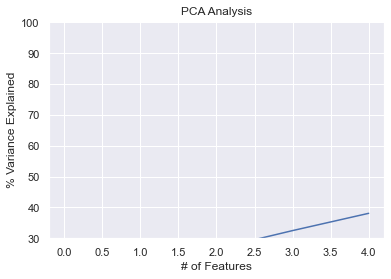

In [114]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [115]:
df_comp = pd.DataFrame(pca.components_,columns=list(scaled_df))
df_comp.head()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Exe,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,0.452304,0.312155,0.311311,0.107020,0.069352,0.401866,-0.001750,0.194515,0.410951,0.196427,0.013396,0.004614,-0.030026,-0.042478,0.001234,0.023701,-0.044705,-0.000789,0.008387,-0.005348,0.004171,-0.021541,-0.081233,-0.248954,-0.028694,0.134533,0.274326,0.050409,-0.065469,0.004216,-0.006569,-0.003082,-0.038859,-0.013985,0.024414
1,-0.015104,-0.015866,-0.013475,-0.000535,0.032386,0.008376,-0.002748,-0.010990,-0.012722,0.005030,-0.030641,-0.008333,-0.010499,0.049155,-0.532291,0.509853,0.051061,-0.479720,-0.051314,-0.099495,0.452060,-0.008856,-0.010049,-0.015165,0.013999,0.012710,0.000955,0.011358,-0.009927,-0.013226,-0.007943,0.012416,-0.003694,-0.000685,-0.007310
2,0.019500,0.013631,0.007669,0.207772,0.043811,0.012975,0.016080,0.041373,0.015310,0.011347,0.048411,-0.020774,-0.023415,0.597315,-0.138950,-0.206068,0.596479,-0.126570,-0.023237,-0.010411,-0.197630,-0.008043,-0.018048,0.057273,-0.097458,0.082097,-0.013879,-0.113762,0.119576,-0.091605,-0.013618,0.092862,-0.165778,-0.055278,0.152678
3,0.022079,-0.005888,0.008401,-0.397152,-0.007238,-0.007332,-0.007848,0.028052,0.029399,0.074443,-0.025873,-0.010392,-0.019320,0.231296,-0.054681,-0.078588,0.233539,-0.043189,0.012251,-0.043949,-0.072727,-0.007349,0.046254,-0.073096,0.026932,0.030869,-0.003394,0.206362,-0.222018,0.452385,-0.011922,-0.450587,0.303049,0.057755,-0.320350
4,0.037635,0.045849,0.027682,-0.438780,-0.091263,0.023763,0.030426,-0.010050,0.020139,0.033459,0.049980,-0.072584,0.033856,0.089408,-0.011064,-0.039667,0.085911,-0.032990,0.058048,0.012907,-0.035615,0.043235,-0.011825,-0.071879,0.051030,-0.029888,0.048712,0.002966,-0.004221,-0.499713,-0.027004,0.501511,0.336285,0.079742,-0.354108


<AxesSubplot:>

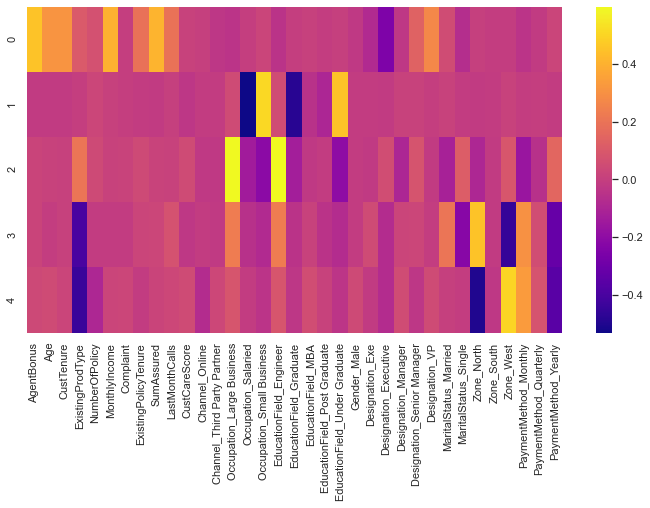

In [116]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself. Component 2 looks more related to aspect  - We can label it as aspect property. Depending on relations ship, we could go ahead and label relationship with features.

In [118]:
from sklearn.cluster import KMeans 

In [119]:
k_means = KMeans(n_clusters = 2)

In [120]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [121]:
k_means.labels_

array([1, 1, 1, ..., 1, 0, 1])

In [122]:
k_means.inertia_

144404.42847886533

In [123]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

134196.70230079163

In [124]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

126689.45524508599

In [125]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

158200.00000000017

In [126]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

121886.96064843437

In [127]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

117897.29294434794

In [128]:
wss =[] 

In [129]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [130]:
wss

[158200.00000000017,
 144404.42847886533,
 134196.70230079163,
 126689.45524508599,
 121886.96064843437,
 117490.11982618901,
 114471.98249825888,
 110332.58417396643,
 107078.37139779047,
 105590.47261570446]

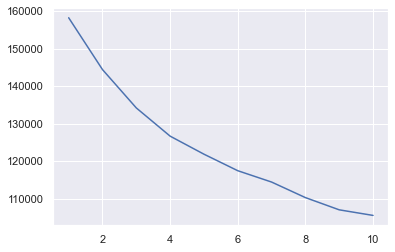

In [131]:
plt.plot(range(1,11), wss)

In [132]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
labels = k_means.labels_

In [133]:
df["Clus_kmeans"] = labels
df.head(5)

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Exe,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Clus_kmeans
0,4409,22.0,4.0,3,2.0,20993.0,1,2.0,806761.0,5,2.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,2214,11.0,2.0,4,4.0,20130.0,0,3.0,294502.0,7,3.0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,4273,26.0,4.0,4,3.0,17090.0,1,2.0,578976.5,0,3.0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0
3,1791,11.0,13.0,3,3.0,17909.0,1,2.0,268635.0,0,5.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,2955,6.0,13.0,3,4.0,18468.0,0,4.0,366405.0,2,5.0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,2


In [134]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [135]:
df.shape

(4520, 36)

In [136]:
link_method = linkage(scaled_df.iloc[:,1:6], method = 'average')

In [137]:
link_method

array([[4.48000000e+02, 6.58000000e+02, 0.00000000e+00, 2.00000000e+00],
       [4.84000000e+02, 6.13000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.02000000e+02, 1.57200000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.03200000e+03, 9.03500000e+03, 4.58893877e+00, 4.51100000e+03],
       [4.27600000e+03, 9.03600000e+03, 4.78603289e+00, 4.51200000e+03],
       [9.02500000e+03, 9.03700000e+03, 6.99203394e+00, 4.52000000e+03]])

In [138]:
labelList = np.array(scaled_df.AgentBonus)
labelList

array([ 0.23601029, -1.32830873,  0.13908665, ..., -0.20370945,
        0.52606853,  0.4890095 ])

In [139]:
#dend = dendrogram(link_method,labels = labelList)

In [140]:
#dend = dendrogram(link_method,
#                 truncate_mode='lastp',
#                 p = 10,
#                 labels = labelList 
#                       )

In [141]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Y = df[["AgentBonus"]]
X = df.drop("AgentBonus", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=8)
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [142]:
LogR = LinearRegression()

In [143]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [144]:
selector = selector.fit(X_train, y_train)

In [145]:
selector.n_features_

15

In [146]:
selector.ranking_

array([11,  9,  1, 13, 20, 19,  8, 21, 17, 16, 12, 15,  1,  1,  1,  1,  1,
        7,  2,  4, 18,  1,  1,  1,  1,  3, 10, 14,  5,  1,  6,  1,  1,  1,
        1])

In [147]:
df_feature = pd.DataFrame({'Feature': X_train_scaled.columns, 'Rank': selector.ranking_})
df_feature[df_feature['Rank'] == 1 ]

,Feature,Rank
2,ExistingProdType,1
12,Occupation_Large Business,1
13,Occupation_Salaried,1
14,Occupation_Small Business,1
15,EducationField_Engineer,1
16,EducationField_Graduate,1
21,Designation_Exe,1
22,Designation_Executive,1
23,Designation_Manager,1
24,Designation_Senior Manager,1


In [148]:
# Most important features are Designation , Occupation, South zone , PaymentMethod, ExistingProdType, Education Field, 
#Zone west and North, ExistingPolicyTenure, CustTenure, Age

In [149]:
from sklearn.cluster import AgglomerativeClustering

In [150]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(scaled_df.iloc[:,1:6])
print(Cluster_agglo)

[4 4 4 ... 4 4 4]


In [151]:
#df.drop(columns=['Agglo_CLusters'],inplace=True)
df.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel_Online',
       'Channel_Third Party Partner', 'Occupation_Large Business',
       'Occupation_Salaried', 'Occupation_Small Business',
       'EducationField_Engineer', 'EducationField_Graduate',
       'EducationField_MBA', 'EducationField_Post Graduate',
       'EducationField_Under Graduate', 'Gender_Male', 'Designation_Exe',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior Manager', 'Designation_VP', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Zone_North', 'Zone_South', 'Zone_West',
       'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly', 'Clus_kmeans'],
      dtype='object')

In [152]:
df["Agglo_Clusters"]=Cluster_agglo

In [153]:
agglo_data=df.groupby('Agglo_Clusters').mean()
agglo_data['Freq']=df.Agglo_Clusters.value_counts().sort_index()
agglo_data.T

Agglo_Clusters,0,1,2,3,4
AgentBonus,6132.635922,6741.50,7468.0,9195.375,3857.676679
Age,22.885922,9.75,7.0,55.250,13.479121
CustTenure,22.283981,39.00,45.0,41.250,13.517949
ExistingProdType,3.783981,6.00,2.0,4.625,3.675702
NumberOfPolicy,3.774272,4.00,6.0,4.250,3.546764
MonthlyIncome,34274.157767,29199.00,21606.0,37733.750,21636.112088
Complaint,0.283981,0.00,1.0,0.250,0.287668
ExistingPolicyTenure,4.893204,7.75,4.0,4.625,3.998046
SumAssured,907792.424757,1089903.25,955936.0,1457508.375,587324.779731
LastMonthCalls,6.817961,4.25,8.0,6.875,4.401709


In [154]:
agglo_data

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Exe,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Clus_kmeans,Freq
Agglo_Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6132.635922,22.885922,22.283981,3.783981,3.774272,34274.157767,0.283981,4.893204,9.077924e+05,6.817961,3.269417,0.089806,0.145631,0.043689,0.500000,0.456311,0.041262,0.419903,0.036408,0.041262,0.354369,0.626214,0.000000,0.000000,0.007282,0.038835,0.526699,0.550971,0.228155,0.368932,0.000000,0.611650,0.072816,0.012136,0.274272,2.696602,412
1,6741.500000,9.750000,39.000000,6.000000,4.000000,29199.000000,0.000000,7.750000,1.089903e+06,4.250000,3.000000,0.000000,0.000000,0.250000,0.500000,0.250000,0.250000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.250000,0.250000,0.250000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.500000,4
2,7468.000000,7.000000,45.000000,2.000000,6.000000,21606.000000,1.000000,4.000000,9.559360e+05,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1
3,9195.375000,55.250000,41.250000,4.625000,4.250000,37733.750000,0.250000,4.625000,1.457508e+06,6.875000,3.500000,0.250000,0.000000,0.000000,0.625000,0.375000,0.000000,0.625000,0.000000,0.000000,0.375000,0.625000,0.000000,0.000000,0.000000,0.000000,1.000000,0.375000,0.125000,0.375000,0.000000,0.625000,0.000000,0.000000,0.375000,3.000000,8
4,3857.676679,13.479121,13.517949,3.675702,3.546764,21636.112088,0.287668,3.998046,5.873248e+05,4.401709,3.046154,0.104762,0.194872,0.094994,0.483028,0.421490,0.095238,0.412454,0.014408,0.057387,0.310379,0.591697,0.031013,0.374847,0.394383,0.160684,0.000000,0.497192,0.329915,0.421978,0.001465,0.562882,0.078877,0.017338,0.320879,1.027595,4095


In [155]:
#agglo_data.columns['Agglo_CLusters']
agglo_data[['AgentBonus','SumAssured','Age', 'CustTenure', 'ExistingProdType', 'MonthlyIncome',
            'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'EducationField_Engineer', 
            'EducationField_Graduate', 'EducationField_MBA', 'EducationField_Post Graduate', 'EducationField_Under Graduate', 
             'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP', 
            'MaritalStatus_Married', 'Zone_South',  'PaymentMethod_Monthly', 'PaymentMethod_Quarterly', 
            'PaymentMethod_Yearly', 'Freq','CustTenure' ,'Zone_North','Zone_West','Designation_Exe', 'Designation_Executive']].T

Agglo_Clusters,0,1,2,3,4
AgentBonus,6132.635922,6741.50,7468.0,9195.375,3857.676679
SumAssured,907792.424757,1089903.25,955936.0,1457508.375,587324.779731
Age,22.885922,9.75,7.0,55.250,13.479121
CustTenure,22.283981,39.00,45.0,41.250,13.517949
ExistingProdType,3.783981,6.00,2.0,4.625,3.675702
MonthlyIncome,34274.157767,29199.00,21606.0,37733.750,21636.112088
Occupation_Large Business,0.043689,0.25,0.0,0.000,0.094994
Occupation_Salaried,0.500000,0.50,1.0,0.625,0.483028
Occupation_Small Business,0.456311,0.25,0.0,0.375,0.421490
EducationField_Engineer,0.041262,0.25,0.0,0.000,0.095238


In [156]:
agglo_data.T

Agglo_Clusters,0,1,2,3,4
AgentBonus,6132.635922,6741.50,7468.0,9195.375,3857.676679
Age,22.885922,9.75,7.0,55.250,13.479121
CustTenure,22.283981,39.00,45.0,41.250,13.517949
ExistingProdType,3.783981,6.00,2.0,4.625,3.675702
NumberOfPolicy,3.774272,4.00,6.0,4.250,3.546764
MonthlyIncome,34274.157767,29199.00,21606.0,37733.750,21636.112088
Complaint,0.283981,0.00,1.0,0.250,0.287668
ExistingPolicyTenure,4.893204,7.75,4.0,4.625,3.998046
SumAssured,907792.424757,1089903.25,955936.0,1457508.375,587324.779731
LastMonthCalls,6.817961,4.25,8.0,6.875,4.401709


In [157]:
df.tail(5)

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Exe,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Clus_kmeans,Agglo_Clusters
4515,3953,4.0,8.0,4,2.0,26355.0,0,2.0,636473.0,9,1.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,2,4
4516,2939,9.0,9.0,2,2.0,20991.0,0,3.0,296813.0,1,3.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,4
4517,3792,23.0,23.0,5,5.0,21606.0,0,2.0,667371.0,4,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,4
4518,4816,10.0,10.0,4,2.0,20068.0,0,6.0,943999.0,1,5.0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,2,4
4519,4764,14.0,10.0,5,2.0,23820.0,0,3.0,700308.0,1,3.0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,4


In [158]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [159]:
silhouette_score(scaled_df,labels)

0.11812323239864359

In [160]:
sil_width = silhouette_samples(scaled_df,labels)

In [161]:
df["sil_width"] = sil_width
df.head(5)

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third Party Partner,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post Graduate,EducationField_Under Graduate,Gender_Male,Designation_Exe,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Clus_kmeans,Agglo_Clusters,sil_width
0,4409,22.0,4.0,3,2.0,20993.0,1,2.0,806761.0,5,2.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,4,0.100763
1,2214,11.0,2.0,4,4.0,20130.0,0,3.0,294502.0,7,3.0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,4,0.098813
2,4273,26.0,4.0,4,3.0,17090.0,1,2.0,578976.5,0,3.0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,4,0.006625
3,1791,11.0,13.0,3,3.0,17909.0,1,2.0,268635.0,0,5.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,4,0.102363
4,2955,6.0,13.0,3,4.0,18468.0,0,4.0,366405.0,2,5.0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,2,4,0.194707


In [162]:
silhouette_samples(scaled_df,labels).min()

-0.1084158537063405

In [163]:
df.to_csv('km.csv')

In [164]:
df.drop(columns=['sil_width','Clus_kmeans'],  inplace=True)

In [165]:
df.columns = df.columns.str.replace(' ','_')

In [166]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [167]:
calc_vif(df).sort_values(by='VIF', ascending = False)

,variables,VIF
14,Occupation_Salaried,163.510600
5,MonthlyIncome,143.287388
15,Occupation_Small_Business,121.653120
3,ExistingProdType,64.107943
0,AgentBonus,49.676191
35,Agglo_Clusters,49.216890
13,Occupation_Large_Business,45.003817
31,Zone_West,40.643026
17,EducationField_Graduate,31.052427
29,Zone_North,30.124808



Here, we see that the value of VIF is high for many variables. Here, we may drop variables with VIF more than 5 (very high correlation) & build our model

In [168]:
X = df.drop("AgentBonus", axis=1)
X.head()

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third_Party_Partner,Occupation_Large_Business,Occupation_Salaried,Occupation_Small_Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post_Graduate,EducationField_Under_Graduate,Gender_Male,Designation_Exe,Designation_Executive,Designation_Manager,Designation_Senior_Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Agglo_Clusters
0,22.0,4.0,3,2.0,20993.0,1,2.0,806761.0,5,2.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,4
1,11.0,2.0,4,4.0,20130.0,0,3.0,294502.0,7,3.0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,4
2,26.0,4.0,4,3.0,17090.0,1,2.0,578976.5,0,3.0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,4
3,11.0,13.0,3,3.0,17909.0,1,2.0,268635.0,0,5.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,4
4,6.0,13.0,3,4.0,18468.0,0,4.0,366405.0,2,5.0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,4


In [169]:
Y = df[["AgentBonus"]]
Y.head()

,AgentBonus
0,4409
1,2214
2,4273
3,1791
4,2955


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=8)

In [172]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

# Using Statsmodels OLS

In [174]:
X_con=sm.add_constant(X)

In [175]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, Y, test_size=0.30 , random_state=8)

In [176]:
model = sm.OLS(y_trainc,X_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     376.5
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:11:37   Log-Likelihood:                -24798.
No. Observations:                3164   AIC:                         4.967e+04
Df Residuals:                    3128   BIC:                         4.989e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1302.7182    495.358      2.630      0.009     331.458    2273.978
Age                              22.3054      1.470     15.170      0.000      19.423      25.188
CustTenure                       23.5837      1.459     16.165      0.000      20.723      26.444
ExistingProdType                 37.0125     22.561      1.641      0.101      -7.223      81.248
NumberOfPolicy                    3.6064      8.017      0.450      0.653     -12.112      19.325
MonthlyIncome                     0.0322      0.006      5.443      0.000       0.021       0.044
Complaint                        29.6882     24.275      1.223      0.221     -17.909      77.285
ExistingPolicyTenure             32.7568      3.527      9.288      0.000      25.842      39.672
SumAssured                        0.0034   6.05e-05     56.775      0.000       0.003       0.004
LastMonthCalls                   -1.7463      3.352     -0.521      0.602      -8.318       4.825
CustCareScore                     3.4902      8.087      0.432      0.666     -12.365      19.346
Channel_Online                   15.2347     36.443      0.418      0.676     -56.221      86.690
Channel_Third_Party_Partner      19.2115     28.375      0.677      0.498     -36.424      74.847
Occupation_Large_Business      -636.7982    467.077     -1.363      0.173   -1552.606     279.009
Occupation_Salaried            -674.8400    441.006     -1.530      0.126   -1539.531     189.851
Occupation_Small_Business      -692.2619    450.606     -1.536      0.125   -1575.775     191.251
EducationField_Engineer         -22.7474    172.628     -0.132      0.895    -361.222     315.727
EducationField_Graduate          -8.0384     97.894     -0.082      0.935    -199.981     183.904
EducationField_MBA             -148.5732    131.785     -1.127      0.260    -406.968     109.822
EducationField_Post_Graduate    -40.9633    107.961     -0.379      0.704    -252.645     170.719
EducationField_Under_Graduate     0.7167     39.936      0.018      0.986     -77.586      79.019
Gender_Male                       9.9057     22.637      0.438      0.662     -34.479      54.290
Designation_Exe                -943.0769     96.711     -9.752      0.000   -1132.700    -753.454
Designation_Executive          -482.5651     68.032     -7.093      0.000    -615.956    -349.174
Designation_Manager            -478.3649     61.472     -7.782      0.000    -598.894    -357.835
Designation_Senior_Manager     -288.3461     62.548     -4.610      0.000    -410.986    -165.706
Designation_VP                  112.3353     74.772      1.502      0.133     -34.271     258.942
MaritalStatus_Married             0.3029     30.332      0.010      0.992     -59.169      59.775
MaritalStatus_Single              5.7490     

In [177]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [178]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [179]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

610.4833684454707

In [180]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test, y_test)

0.8128013867562254

In [181]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

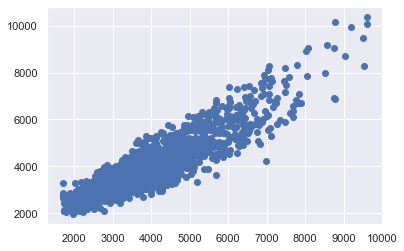

In [182]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500

plt.scatter(y_test['AgentBonus'], y_pred)

In [183]:
#Get the value of coefficient of determination

In [184]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 80.8155 %


In [185]:
#Get the Predictions on test set

In [186]:
ypred = model.predict(X_testc)
print(ypred)

2744    2502.105077
3992    4059.066631
3332    4011.357228
472     3542.932786
1168    3147.634040
           ...     
1360    2498.504349
1493    3098.409102
4213    5500.980064
3586    3147.504278
2019    4103.501779
Length: 1356, dtype: float64


In [187]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,y_pred)))

The Root Mean Square Error (RMSE) of the model is for testing set is 610.4833684454703


In [188]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [189]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.8081545628073115


In [190]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.8128013867562254


In [191]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 610.4833684454703


In [192]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is 22.305433275008976
The coefficient for CustTenure is 23.58367512263337
The coefficient for ExistingProdType is 37.012483187760225
The coefficient for NumberOfPolicy is 3.606394132314583
The coefficient for MonthlyIncome is 0.032234148060110934
The coefficient for Complaint is 29.68818504147072
The coefficient for ExistingPolicyTenure is 32.75681083566654
The coefficient for SumAssured is 0.003434757827044166
The coefficient for LastMonthCalls is -1.7463113487215107
The coefficient for CustCareScore is 3.4901993912915645
The coefficient for Channel_Online is 15.234739260186267
The coefficient for Channel_Third_Party_Partner is 19.211451094874846
The coefficient for Occupation_Large_Business is -636.7982076762647
The coefficient for Occupation_Salaried is -674.8400296635879
The coefficient for Occupation_Small_Business is -692.2618592484126
The coefficient for EducationField_Engineer is -22.74738361107367
The coefficient for EducationField_Graduate is -8.038410

In [193]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1302.718206585811


In [194]:
regression_model.score(X_train, y_train)

0.8081545628073115

In [195]:
regression_model.score(X_test, y_test)

0.8128013867562254

In [196]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel_Online,Channel_Third_Party_Partner,Occupation_Large_Business,Occupation_Salaried,Occupation_Small_Business,EducationField_Engineer,EducationField_Graduate,EducationField_MBA,EducationField_Post_Graduate,EducationField_Under_Graduate,Gender_Male,Designation_Exe,Designation_Executive,Designation_Manager,Designation_Senior_Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly,Agglo_Clusters,AgentBonus
4089,21.0,11.0,6,4.0,22165.0,0,1.0,663177.0,5,3.0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,4,3546
696,13.0,6.0,4,4.0,17743.0,0,1.0,408799.0,2,5.0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,4,3194
171,18.0,22.0,3,3.0,20296.0,0,1.0,617404.0,7,5.0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,4,3653
102,3.0,13.0,3,3.0,18161.0,1,3.0,581152.0,0,5.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,4,2906
243,25.0,10.0,4,5.0,25266.0,0,6.0,717554.0,11,2.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,4,5053


In [197]:
regression_model_scaled = LinearRegression()
regression_model_scaled.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [198]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_scaled.coef_[0][idx]))

The coefficient for Age is 0.13767054291276307
The coefficient for CustTenure is 0.14673231545576854
The coefficient for ExistingProdType is 0.026583240287272193
The coefficient for NumberOfPolicy is 0.0037266361191006896
The coefficient for MonthlyIncome is 0.11051475089919886
The coefficient for Complaint is 0.009653017910747817
The coefficient for ExistingPolicyTenure is 0.07721280682869969
The coefficient for SumAssured is 0.5911963397769338
The coefficient for LastMonthCalls is -0.0044820220773235525
The coefficient for CustCareScore is 0.0034218816627441077
The coefficient for Channel_Online is 0.003357526778051917
The coefficient for Channel_Third_Party_Partner is 0.005414297785330311
The coefficient for Occupation_Large_Business is -0.1289981397245527
The coefficient for Occupation_Salaried is -0.24104793809459416
The coefficient for Occupation_Small_Business is -0.24364887911792552
The coefficient for EducationField_Engineer is -0.004600537950311366
The coefficient for Educati

In [199]:
intercept = regression_model_scaled.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 7.798336340434967e-18


In [200]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model_scaled.score(X_test_scaled, y_test_scaled)

0.8125601603968964

In [201]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse_scaled = np.mean((regression_model_scaled.predict(X_test_scaled)-y_test_scaled)**2)

In [202]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse_scaled)

0.432943229076404

In [203]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred_scaled = regression_model_scaled.predict(X_test_scaled)

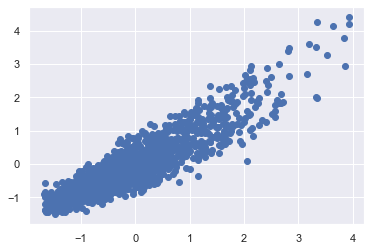

In [204]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['AgentBonus'], y_pred_scaled)

In [205]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [206]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [207]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

Age ---> 4.974204076010754
CustTenure ---> 5.0042780103168765
ExistingProdType ---> 64.01833054809883
NumberOfPolicy ---> 7.8321774219042455
MonthlyIncome ---> 141.82458279669777
Complaint ---> 1.414558834499288
ExistingPolicyTenure ---> 2.8678193653545065
SumAssured ---> 13.290246233456738
LastMonthCalls ---> 3.1858820162173864
CustCareScore ---> 6.091559455568143
Channel_Online ---> 1.1686497715165352


In [208]:
X_no_out = no_out_df.drop(['AgentBonus'], axis=1)
Y_no_out = no_out_df[["AgentBonus"]]

In [209]:
#for feature in cat_names: 
#    if X_no_out[feature].dtype == 'object':
#        X_no_out[feature] = pd.Categorical(X_no_out[feature]).codes
X_no_out = pd.get_dummies(X_no_out, columns=cat_names,drop_first=True)

In [210]:
#X_no_out = X_no_out.drop(['bonus_range','AgeRange','income_range'], axis=1)
X_train_no_out, X_test_no_out, y_train_no_out, y_test_no_out = train_test_split(X_no_out, Y_no_out , test_size=0.30 , random_state=8)

In [211]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_out = LinearRegression()
regression_model_out.fit(X_train_no_out, y_train_no_out)

LinearRegression()

In [212]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_no_out.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_out.coef_[0][idx]))

The coefficient for Age is 21.16035136703995
The coefficient for CustTenure is 22.43803112721254
The coefficient for ExistingProdType is 35.64162751908745
The coefficient for NumberOfPolicy is 4.385210311006258
The coefficient for MonthlyIncome is 0.03218690988832312
The coefficient for Complaint is 25.336989517761737
The coefficient for ExistingPolicyTenure is 35.68936973913441
The coefficient for SumAssured is 0.0035582576401367305
The coefficient for LastMonthCalls is -0.4588578496119094
The coefficient for CustCareScore is 2.40072559100181
The coefficient for Channel_Online is 8.067521549077147
The coefficient for Channel_Third Party Partner is 17.41914062086986
The coefficient for Occupation_Large Business is -624.9404677783616
The coefficient for Occupation_Salaried is -667.5143860777937
The coefficient for Occupation_Small Business is -693.2541275356853
The coefficient for EducationField_Engineer is -38.048640773593306
The coefficient for EducationField_Graduate is -20.382776609

In [213]:
intercept = regression_model_out.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1412.8814770774493


In [214]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model_out.score(X_test_no_out, y_test_no_out)

0.8039846439306599

In [215]:
calc_vif(df).sort_values(by='VIF', ascending = True)

,variables,VIF
30,Zone_South,1.097750
33,PaymentMethod_Quarterly,1.124055
11,Channel_Online,1.168744
12,Channel_Third_Party_Partner,1.285194
6,Complaint,1.415376
22,Designation_Exe,2.129217
18,EducationField_MBA,2.250673
26,Designation_VP,2.364060
32,PaymentMethod_Monthly,2.491524
21,Gender_Male,2.535430


# Tuning

In [217]:
df_vif=df[['Zone_South','PaymentMethod_Quarterly','Channel_Online','Channel_Third_Party_Partner'
   ,'Complaint','Designation_Exe','Designation_VP','EducationField_MBA','PaymentMethod_Monthly'
   ,'Gender_Male','MaritalStatus_Single','ExistingPolicyTenure','LastMonthCalls','PaymentMethod_Yearly'
   ,'Designation_Senior_Manager','MaritalStatus_Married','EducationField_Under_Graduate','AgentBonus','EducationField_Post_Graduate'
   ,'Age','CustTenure','CustCareScore','NumberOfPolicy','Designation_Manager','Designation_Executive','EducationField_Engineer'
    ,'SumAssured','Zone_North','EducationField_Graduate','Occupation_Large_Business','Zone_West','ExistingProdType','MonthlyIncome'
           ,'Occupation_Small_Business']]
#score is max when we remove Occupation_Salaried

In [218]:
df_vif

,Zone_South,PaymentMethod_Quarterly,Channel_Online,Channel_Third_Party_Partner,Complaint,Designation_Exe,Designation_VP,EducationField_MBA,PaymentMethod_Monthly,Gender_Male,MaritalStatus_Single,ExistingPolicyTenure,LastMonthCalls,PaymentMethod_Yearly,Designation_Senior_Manager,MaritalStatus_Married,EducationField_Under_Graduate,AgentBonus,EducationField_Post_Graduate,Age,CustTenure,CustCareScore,NumberOfPolicy,Designation_Manager,Designation_Executive,EducationField_Engineer,SumAssured,Zone_North,EducationField_Graduate,Occupation_Large_Business,Zone_West,ExistingProdType,MonthlyIncome,Occupation_Small_Business
0,0,0,0,0,1,0,0,0,0,0,1,2.0,5,0,0,0,0,4409,0,22.0,4.0,2.0,2.0,1,0,0,806761.0,1,1,0,0,3,20993.0,0
1,0,0,0,1,0,0,0,0,0,1,0,3.0,7,1,0,0,0,2214,0,11.0,2.0,3.0,4.0,1,0,0,294502.0,1,1,0,0,4,20130.0,0
2,0,0,0,0,1,1,0,0,0,1,1,2.0,0,1,0,0,0,4273,1,26.0,4.0,3.0,3.0,0,0,0,578976.5,1,0,0,0,4,17090.0,0
3,0,0,0,1,1,0,0,0,0,0,0,2.0,0,0,0,0,0,1791,0,11.0,13.0,5.0,3.0,0,1,0,268635.0,0,1,0,1,3,17909.0,0
4,0,0,0,0,0,0,0,0,0,1,0,4.0,2,0,0,0,1,2955,0,6.0,13.0,5.0,4.0,0,1,0,366405.0,0,0,0,1,3,18468.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,0,0,0,0,0,0,0,0,0,1,1,2.0,9,1,1,0,0,3953,0,4.0,8.0,1.0,2.0,0,0,0,636473.0,0,1,0,1,4,26355.0,1
4516,0,0,0,0,0,0,0,0,0,0,0,3.0,1,1,0,1,1,2939,0,9.0,9.0,3.0,2.0,0,1,0,296813.0,1,0,0,0,2,20991.0,0
4517,0,0,0,0,0,0,0,0,0,0,1,2.0,4,0,0,0,0,3792,0,23.0,23.0,1.0,5.0,0,0,1,667371.0,1,0,0,0,5,21606.0,0
4518,0,0,1,0,0,0,0,0,0,0,1,6.0,1,0,0,0,0,4816,0,10.0,10.0,5.0,2.0,0,1,0,943999.0,0,1,0,1,4,20068.0,1


In [219]:
X_vif=df_vif.drop('AgentBonus', axis=1)
Y_vif=df_vif[['AgentBonus']]

In [220]:
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_vif, Y_vif , test_size=0.30 , random_state=8)

In [221]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_vif = LinearRegression()
regression_model_vif.fit(X_train_vif, y_train_vif)

LinearRegression()

In [222]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train_vif.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model_vif.coef_[0][idx]))
intercept_vif = regression_model_vif.intercept_[0]

print("The intercept for our model is {}".format(intercept_vif))

The coefficient for Zone_South is -177.53074739826755
The coefficient for PaymentMethod_Quarterly is 140.20712725616963
The coefficient for Channel_Online is 13.012341753675729
The coefficient for Channel_Third_Party_Partner is 20.487115418348655
The coefficient for Complaint is 31.685361413976963
The coefficient for Designation_Exe is -914.2840345317121
The coefficient for Designation_VP is 83.61466592603371
The coefficient for EducationField_MBA is -152.46678008724237
The coefficient for PaymentMethod_Monthly is 161.46517974037127
The coefficient for Gender_Male is 10.083903510394341
The coefficient for MaritalStatus_Single is 7.317067441019994
The coefficient for ExistingPolicyTenure is 32.914820300413645
The coefficient for LastMonthCalls is -1.5066627383331075
The coefficient for PaymentMethod_Yearly is -63.09658265704684
The coefficient for Designation_Senior_Manager is -234.90779982050515
The coefficient for MaritalStatus_Married is 0.2273700794131594
The coefficient for Educati

In [223]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model_vif.score(X_test_vif, y_test_vif)

0.8131119381670872

In [224]:
#we can see that the scaled putput has a better score

In [225]:
expr= 'AgentBonus ~ Zone_South + PaymentMethod_Quarterly + Channel_Online + Channel_Third_Party_Partner + Complaint + Designation_Exe + Designation_VP+EducationField_MBA +PaymentMethod_Monthly+Gender_Male+MaritalStatus_Single+ExistingPolicyTenure+LastMonthCalls+PaymentMethod_Yearly+Designation_Senior_Manager+MaritalStatus_Married+EducationField_Under_Graduate+EducationField_Post_Graduate+Age+CustTenure+CustCareScore+NumberOfPolicy+Designation_Manager+Designation_Executive+EducationField_Engineer+SumAssured+Zone_North+EducationField_Graduate+Occupation_Large_Business+Zone_West+ExistingProdType+MonthlyIncome+Occupation_Small_Business'

In [226]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = df_vif).fit()
lm1.params

Intercept                        843.694069
Zone_South                        -0.743471
PaymentMethod_Quarterly          121.985130
Channel_Online                    16.452712
Channel_Third_Party_Partner        8.639260
Complaint                         31.425465
Designation_Exe                 -896.998779
Designation_VP                    19.689241
EducationField_MBA              -134.730077
PaymentMethod_Monthly            179.770948
Gender_Male                        3.736511
MaritalStatus_Single              13.121798
ExistingPolicyTenure              35.545569
LastMonthCalls                    -2.622818
PaymentMethod_Yearly             -71.133166
Designation_Senior_Manager      -261.650782
MaritalStatus_Married            -16.469356
EducationField_Under_Graduate     15.535704
EducationField_Post_Graduate     -76.117914
Age                               23.035100
CustTenure                        24.001376
CustCareScore                      6.006542
NumberOfPolicy                  

In [227]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     579.7
Date:                Sun, 16 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:13:01   Log-Likelihood:                -35414.
No. Observations:                4520   AIC:                         7.090e+04
Df Residuals:                    4486   BIC:                         7.111e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [228]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(843.69) * Intercept + (-0.74) * Zone_South + (121.99) * PaymentMethod_Quarterly + (16.45) * Channel_Online + (8.64) * Channel_Third_Party_Partner + (31.43) * Complaint + (-897.0) * Designation_Exe + (19.69) * Designation_VP + (-134.73) * EducationField_MBA + (179.77) * PaymentMethod_Monthly + (3.74) * Gender_Male + (13.12) * MaritalStatus_Single + (35.55) * ExistingPolicyTenure + (-2.62) * LastMonthCalls + (-71.13) * PaymentMethod_Yearly + (-261.65) * Designation_Senior_Manager + (-16.47) * MaritalStatus_Married + (15.54) * EducationField_Under_Graduate + (-76.12) * EducationField_Post_Graduate + (23.04) * Age + (24.0) * CustTenure + (6.01) * CustCareScore + (1.52) * NumberOfPolicy + (-447.69) * Designation_Manager + (-469.53) * Designation_Executive + (-39.86) * EducationField_Engineer + (0.0) * SumAssured + (-44.05) * Zone_North + (-63.73) * EducationField_Graduate + (-39.31) * Occupation_Large_Business + (-44.97) * Zone_West + (54.11) * ExistingProdType + (0.03) * MonthlyIncome + (

In [229]:
X_train_tun, X_test_tun, y_train_tun, y_test_tun = train_test_split(X_vif, Y, test_size=0.25, random_state=8)
X_train_scaled_tun  = X_train.apply(zscore)
X_test_scaled_tun = X_test.apply(zscore)
y_train_scaled_tun = y_train.apply(zscore)
y_test_scaled_tun = y_test.apply(zscore)

In [230]:
regression_model_tun = LinearRegression()
regression_model_tun.fit(X_train_tun, y_train_tun)
regression_model_tun.score(X_test_tun, y_test_tun)

0.8132000652084972

In [231]:
regression_model_scaled_tun = LinearRegression()
regression_model_scaled_tun.fit(X_train_scaled_tun, y_train_scaled_tun)
regression_model_scaled_tun.score(X_test_scaled_tun, y_test_scaled_tun)

0.8125601603968964

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0



# Conclusion

The final Linear Regression equation is

AgentBonus = b0 * Intercept + b1 * Zone_South + b2 * PaymentMethod_Quarterly + b3 * Channel_Online + b4 * Channel_Third_Party_Partner + b5 * Complaint + b6 * Designation_Exe + b7 * Designation_VP + b8 * EducationField_MBA + b9 * PaymentMethod_Monthly + b10 * Gender_Male + b11 * MaritalStatus_Single + b12 * ExistingPolicyTenure + b13 * LastMonthCalls + b14 * PaymentMethod_Yearly + b15 * Designation_Senior_Manager + b16 * MaritalStatus_Married + b17 * EducationField_Under_Graduate + b18 * EducationField_Post_Graduate + b19 * Age + b20 * CustTenure + b21 * CustCareScore + b22 * NumberOfPolicy + b23 * Designation_Manager + b24 * Designation_Executive + b25 * EducationField_Engineer + b26 * SumAssured + b27 * Zone_North + b28 * EducationField_Graduate + b29 * Occupation_Large_Business + b30 * Zone_West + b31 * ExistingProdType + b32 * MonthlyIncome + b33 * Occupation_Small_Business

AgentBonus = (843.69) * Intercept + (-0.74) * Zone_South + (121.99) * PaymentMethod_Quarterly + (16.45) * Channel_Online + (8.64) * Channel_Third_Party_Partner + (31.43) * Complaint + (-897.0) * Designation_Exe + (19.69) * Designation_VP + (-134.73) * EducationField_MBA + (179.77) * PaymentMethod_Monthly + (3.74) * Gender_Male + (13.12) * MaritalStatus_Single + (35.55) * ExistingPolicyTenure + (-2.62) * LastMonthCalls + (-71.13) * PaymentMethod_Yearly + (-261.65) * Designation_Senior_Manager + (-16.47) * MaritalStatus_Married + (15.54) * EducationField_Under_Graduate + (-76.12) * EducationField_Post_Graduate + (23.04) * Age + (24.0) * CustTenure + (6.01) * CustCareScore + (1.52) * NumberOfPolicy + (-447.69) * Designation_Manager + (-469.53) * Designation_Executive + (-39.86) * EducationField_Engineer + (0.0) * SumAssured + (-44.05) * Zone_North + (-63.73) * EducationField_Graduate + (-39.31) * Occupation_Large_Business + (-44.97) * Zone_West + (54.11) * ExistingProdType + (0.03) * MonthlyIncome + (-92.01) * Occupation_Small_Business

When Age increases by 1 unit, AgentBonus increases by 23.04 units, keeping all other predictors constant.
similarly, when MonthlyIncome increases by 1 unit, AgentBonus increases by 0.03 units, keeping all other predictors constant.

There are also some negative co-efficient values. Occupation_Large_Business has its corresponding co-efficient as -39.31. This implies, when the Occupation is Large business, the AgentBonus decreases by 39.31 units, keeping all other predictors constant.

In [232]:
y_pred = lm1.predict(X_test_tun)

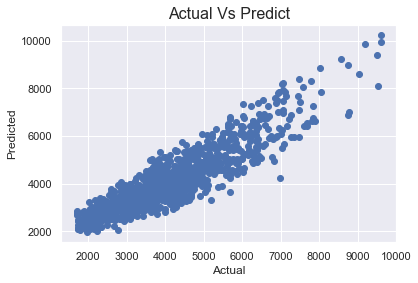

In [233]:
plt.scatter(y_test_tun['AgentBonus'], y_pred)
plt.title('Actual Vs Predict',fontsize=16)
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

In [234]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [235]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=8, max_iter=1000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=8)
dtr = tree.DecisionTreeRegressor(random_state=8)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(X_train_tun,y_train_tun)
        scores_train.append(i.score(X_train_tun, y_train_tun))
        scores_test.append(i.score(X_test_tun, y_test_tun))
        rmse_train.append(np.sqrt(mean_squared_error(y_train_tun,i.predict(X_train_tun))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test_tun,i.predict(X_test_tun))))
 
    else :
        i.fit(X_train_scaled_tun,y_train_scaled_tun)
        scores_train.append(i.score(X_train_scaled_tun, y_train_scaled_tun))
        scores_test.append(i.score(X_test_scaled_tun, y_test_scaled_tun))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train_scaled_tun))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test_scaled_tun))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

<ipython-input-235-70fc2b6f821c>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(X_train_tun,y_train_tun)
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                          Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression         611.612103   614.934255        0.808172    0.813200
Decision Tree Regressor     0.000000   744.328618        1.000000    0.726316
Random Forest Regressor   200.059407   519.298515        0.979475    0.866785
ANN Regressor            4315.881788  4303.418081        0.969355    0.781622


In [244]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=8)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train_tun,y_train_tun)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 40}


In [245]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 40,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=8)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

grid_search.fit(X_train_tun,y_train_tun)

In [246]:
print(grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [247]:
#best_params_rfr={'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}

Using Grid Search for ANN

In [249]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=1000, random_state=8)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [250]:
grid_search.fit(X_train_scaled_tun,y_train_scaled_tun)

C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=1000, random_state=8),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [251]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'sgd'}


In [252]:
#best_params_annr={'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'sgd'}

In [253]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=8, 
                    max_iter=1000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=8)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=40,min_samples_leaf=3,random_state=8)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(X_train_tun,y_train_tun)
        scores_train.append(i.score(X_train_tun, y_train_tun))
        scores_test.append(i.score(X_test_tun, y_test_tun))
        rmse_train.append(np.sqrt(mean_squared_error(y_train_tun,i.predict(X_train_tun))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test_tun,i.predict(X_test_tun))))
        
    else :
        i.fit(X_train_scaled_tun,y_train_scaled_tun)
        scores_train.append(i.score(X_train_scaled_tun, y_train_scaled_tun))
        scores_test.append(i.score(X_test_scaled_tun, y_test_scaled_tun))
        rmse_train.append(np.sqrt(mean_squared_error(y_train_scaled_tun,i.predict(X_train_scaled_tun))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test_scaled_tun,i.predict(X_test_scaled_tun))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

<ipython-input-253-b81a757d3119>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(X_train_tun,y_train_tun)
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        611.612103  614.934255        0.808172    0.813200
Decision Tree Regressor  508.120305  597.920356        0.867599    0.823394
Random Forest Regressor  542.802536  620.584032        0.848908    0.809752
ANN Regressor              0.369968    0.424350        0.863124    0.819927


In [254]:
#Without tuned 

In [255]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=8, 
                    max_iter=5000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=8)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=40,min_samples_leaf=3,random_state=8)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        
    else :
        i.fit(X_train_scaled,y_train_scaled)
        scores_train.append(i.score(X_train_scaled, y_train_scaled))
        scores_test.append(i.score(X_test_scaled, y_test_scaled))
        rmse_train.append(np.sqrt(mean_squared_error(y_train_scaled,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test_scaled,i.predict(X_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

<ipython-input-255-c4cd783707c4>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(X_train,y_train)
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                         Train RMSE   Test RMSE  Training Score  Test Score
Linear Regression        613.101894  610.483368        0.808155    0.812801
Decision Tree Regressor  513.260619  593.156926        0.865550    0.823277
Random Forest Regressor  552.781054  625.002852        0.844047    0.803791
ANN Regressor              0.369968    0.424350        0.863124    0.819927


In [256]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=8, 
                    max_iter=5000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=8)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=40,min_samples_leaf=3,random_state=8)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
    if (i != annr):
        i.fit(X_train_scaled,y_train_scaled)
        scores_train.append(i.score(X_train_scaled, y_train_scaled))
        scores_test.append(i.score(X_test_scaled, y_test_scaled))
        rmse_train.append(np.sqrt(mean_squared_error(y_train_scaled,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test_scaled,i.predict(X_test_scaled))))
        
    else :
        i.fit(X_train_scaled,y_train_scaled)
        scores_train.append(i.score(X_train_scaled, y_train_scaled))
        scores_test.append(i.score(X_test_scaled, y_test_scaled))
        rmse_train.append(np.sqrt(mean_squared_error(y_train_scaled,i.predict(X_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test_scaled,i.predict(X_test_scaled))))
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

<ipython-input-256-f1a881ef031c>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(X_train_scaled,y_train_scaled)
C:\Users\Welcome\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression          0.438002   0.432943        0.808155    0.812560
Decision Tree Regressor    0.366675   0.428688        0.865550    0.816227
Random Forest Regressor    0.394837   0.445444        0.844103    0.801580
ANN Regressor              0.369968   0.424350        0.863124    0.819927
